<a href="https://colab.research.google.com/github/juuaa01/Data-Science-Project/blob/main/Case_Study_02_Kelompok_B_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY

Langkah pertama yang dilakukan adalah mengimport library yang dibutuhkan. Berikut beberapa librarynya:

In [ ]:
!pip install kmodes==0.12.2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.cluster as cluster
import pickle
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder

# MEMBACA DATA

Membaca data dari file CSV. Langkah ini bertujuan untuk memuat data ke dalam DataFrame sehingga dapat diolah dan dianalisis lebih lanjut.

In [ ]:
!wget -q -O Data.csv https://raw.githubusercontent.com/juuaa01/Data-Science-Project/main/Data.csv

df = pd.read_csv("Data.csv",sep=',')
df.head()

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    object 
 3   Pendapatan-per-bulan  200 non-null    int64  
 4   skor-pengeluaran      200 non-null    int64  
 5   Menikah               188 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,ID,Pendapatan-per-bulan,skor-pengeluaran,Promo,FavFlavor
count,200.000000,2.000000e+02,200.00000,194.000000,200.000000
mean,200.500000,1.867213e+07,50.47000,1.685567,3.605000
std,57.879185,1.076423e+07,26.07101,0.970603,2.743466
min,101.000000,0.000000e+00,1.00000,0.000000,0.000000
25%,150.750000,1.086066e+07,34.75000,1.000000,1.000000
50%,200.500000,1.905738e+07,50.00000,1.000000,3.500000
75%,250.250000,2.581967e+07,73.00000,3.000000,6.000000
max,300.000000,5.000000e+07,101.00000,5.000000,9.000000


In [ ]:
df.head()

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8


In [ ]:
print(df.to_string())

      ID Jenis Kelamin Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah       Kota  Promo HariFav  FavFlavor
0    101        Wanita   49              13114754                52       1    Jakarta    1.0   Sabtu          2
1    102        Wanita   32              33606557                86       1      Depok    1.0  Minggu          6
2    103          Pria   51              15983606                41       1    Jakarta    2.0  Minggu          3
3    104          Pria   19              12704918                55       0    Jakarta    1.0    Rabu          7
4    105        Wanita   38              20081967                42       1    Jakarta    2.0   Senin          8
5    106        Wanita   33              29098360                95       1      Depok    0.0   Senin          0
6    107          Pria   27              21311475                56       1    Jakarta    1.0   Senin          5
7    108        Wanita   24               2049180                77       1      Depok    1.0   

In [ ]:
# Cek jumlah baris dan kolom
print("Shape:", df.shape)

# Lihat nama kolom
print("Kolom:", df.columns.tolist())

Shape: (200, 10)
Kolom: ['ID', 'Jenis Kelamin', 'Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor']


# PREPROCESSING

Data preprocessing adalah proses pembersihan dan penyiapan data sebelum dilakukan analisis lebih lanjut. Pada tahap ini, dilakukan pemeriksaan terhadap data yang hilang, duplikat, serta penyesuaian tipe data agar data siap digunakan untuk proses analisis atau pemodelan.

## Cek Duplikat Data

In [ ]:
# Cek apakah ada duplikasi data
print(df.shape)
df.duplicated().sum()

(200, 10)


np.int64(0)

Dataset berisi 200 observasi dan 10 variabel tanpa adanya data yang terduplikasi. Oleh karena itu, data dapat langsung digunakan untuk tahap analisis selanjutnya tanpa perlu proses penghapusan duplikasi.

## Noise

In [ ]:
df['Jenis Kelamin'].value_counts()

,count
Jenis Kelamin,
Wanita,109
Pria,86
-,1


In [ ]:
df['Umur'].value_counts()

,count
Umur,
32,11
49,8
19,8
31,8
35,8
47,7
30,7
36,6
48,6


In [ ]:
df['Pendapatan-per-bulan'].value_counts()

,count
Pendapatan-per-bulan,
15983606,12
25819672,12
13524590,6
29508196,6
19262295,6
...,...
31967213,2
24590163,2
43032786,2


In [ ]:
df['skor-pengeluaran'].value_counts()

,count
skor-pengeluaran,
42,8
55,7
73,6
46,6
52,5
...,...
63,1
85,1
12,1


In [ ]:
df['Menikah'].value_counts()

,count
Menikah,
1,160
0,26
,1
-,1


In [ ]:
df['Kota'].value_counts()

,count
Kota,
Jakarta,87
Depok,59
Tangerang,53
JJakarta,1


In [ ]:
df['Promo'].value_counts()

,count
Promo,
1.0,86
3.0,50
2.0,43
0.0,14
5.0,1


In [ ]:
df['HariFav'].value_counts()

,count
HariFav,
Senin,66
Sabtu,54
Minggu,43
Selasa,21
Kamis,6
Rabu,5
Jumat,5


In [ ]:
df['FavFlavor'].value_counts()

,count
FavFlavor,
0,40
2,20
6,20
3,20
7,20
5,20
1,20
4,20
8,19


**Identifikasi Noise**


---



* ‘Jenis Kelamin’: Terdapat nilai “–” yang tidak termasuk kategori valid (Pria atau Wanita), kemungkinan akibat kesalahan input.

* ‘Menikah’: Ditemukan nilai “–” dan kosong, kemungkinan karena data tidak diisi. Untuk menjaga konsistensi, diasumsikan berdasarkan umur pelanggan.

* ‘Kota’: Nilai “JJakarta” merupakan kesalahan pengetikan dari “Jakarta”.

* ‘Promo’: Nilai 5 di luar rentang 0–3, menunjukkan kesalahan input atau tidak sesuai definisi kategori.

* ‘FavFlavor’: Nilai 9 berada di luar rentang 0–8 (kategori rasa yang valid), kemungkinan hasil kesalahan entri data.

* ‘Skor Penjualan’: Nilai 101 berada diluar rentang 0-100 (skor penjualan seharusnya) kemungkinan disebabkan oleh kesalahan input data.

## Penanganan Noise

In [ ]:
df_clean_all = df.copy()

# Bersihkan format salah pada kolom Umur
df_clean_all['Umur'] = df_clean_all['Umur'].replace("35'", 35)

In [ ]:
# Bersihkan kolom Umur
df['Umur'] = df['Umur'].astype(str).str.replace('[^0-9]', '', regex=True)
df['Umur'] = pd.to_numeric(df['Umur'], errors='coerce')

# Definisikan kondisi noise
cond_gender = df['Jenis Kelamin'].eq('-')  # hanya baris '-' (NaN akan ditangani lain)
cond_age = df['Umur'].isin([2, 0]) | (df['Umur'] > 100)
cond_income = df['Pendapatan-per-bulan'].eq(0)
cond_flavor = df['FavFlavor'].eq(9)

# Pisahkan noise dan bersih
cond_noise_all = cond_gender | cond_age | cond_income | cond_flavor

df_noise_all = df.loc[cond_noise_all].copy()      # hanya baris noise
df_clean_all = df.loc[~cond_noise_all].copy()     # semua baris bersih

# Buat dataset baru (benar-benar bersih)
df_final_clean = df_clean_all.copy()  # dataset baru yang bebas noise

# Menampilkan Hasil
print("Jumlah data noise:", len(df_noise_all))
print("Jumlah data bersih:", len(df_final_clean))
print("Masih ada '-' di Jenis Kelamin?", df_final_clean['Jenis Kelamin'].eq('-').sum())

Jumlah data noise: 4
Jumlah data bersih: 196
Masih ada '-' di Jenis Kelamin? 0


In [ ]:
print(df['Jenis Kelamin'].value_counts(dropna=False))

Jenis Kelamin
Wanita    109
Pria       86
NaN         4
-           1
Name: count, dtype: int64


In [ ]:
# Cek dulu baris dengan nilai Menikah kosong / noise
mask_missing_menikah = df['Menikah'].isin(['-', '', ' '])

# Lihat data yang bermasalah
df_missing_menikah = df[mask_missing_menikah][['Umur', 'Menikah']]

print(df_missing_menikah)

     Umur Menikah
151    30        
180    50       -


In [ ]:
print(df_noise_all.to_string())

      ID Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah       Kota  Promo HariFav  FavFlavor
119  220          Pria     2              18032786                41       0    Jakarta    2.0   Senin          0
130  231        Wanita    44              25819672                20       1  Tangerang    3.0   Sabtu          9
185  286             -    21                     0                81       0      Depok    1.0   Jumat          0
187  288          Pria    19                     0                39       0    Jakarta    2.0   Senin          3


In [ ]:
# Salin dari hasil df_clean_all yang sudah bebas noise awal
df_final_clean = df_clean_all.copy()

# Bersihkan noise di kolom Kota
df_final_clean['Kota'] = df_final_clean['Kota'].replace({
    'JJakarta': 'Jakarta',
    'jakarta': 'Jakarta',
    'DepoK': 'Depok',
    'Tanggerang': 'Tangerang'
})

# Tangani noise di kolom Menikah (bukan NaN)
# Buat mask khusus untuk baris yang mengandung noise simbolik
mask_noise_menikah = df_final_clean['Menikah'].isin(['-', ' ', ''])

# Imputasi hanya untuk baris yang terkena noise
df_final_clean.loc[mask_noise_menikah, 'Menikah'] = df_final_clean.loc[
    mask_noise_menikah, 'Umur'
].apply(lambda x: 1 if x > 25 else 0)

# (baris dengan NaN tetap dibiarkan untuk penanganan nanti)

# Bersihkan noise di kolom Promo
df_final_clean['Promo'] = df_final_clean['Promo'].replace(5.0, 3.0)

# Tangani noise di kolom skor penjualan
df_final_clean.loc[df_final_clean['skor-pengeluaran'] > 100, 'skor-pengeluaran'] = 100

# Cek hasil
print("Cek kolom Kota:")
print(df_final_clean['Kota'].value_counts(dropna=False))

print("\nCek kolom Menikah setelah imputasi noise:")
print(df_final_clean['Menikah'].value_counts(dropna=False))

print("\nCek kolom Promo:")
print(df_final_clean['Promo'].value_counts(dropna=False))

Cek kolom Kota:
Kota
Jakarta      86
Depok        58
Tangerang    52
Name: count, dtype: int64

Cek kolom Menikah setelah imputasi noise:
Menikah
1      159
0       23
NaN     12
1        2
Name: count, dtype: int64

Cek kolom Promo:
Promo
1.0    85
3.0    50
2.0    41
0.0    14
NaN     6
Name: count, dtype: int64


In [ ]:
print(df_final_clean.to_string())

      ID Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah       Kota  Promo HariFav  FavFlavor
0    101        Wanita    49              13114754                52       1    Jakarta    1.0   Sabtu          2
1    102        Wanita    32              33606557                86       1      Depok    1.0  Minggu          6
2    103          Pria    51              15983606                41       1    Jakarta    2.0  Minggu          3
3    104          Pria    19              12704918                55       0    Jakarta    1.0    Rabu          7
4    105        Wanita    38              20081967                42       1    Jakarta    2.0   Senin          8
5    106        Wanita    33              29098360                95       1      Depok    0.0   Senin          0
6    107          Pria    27              21311475                56       1    Jakarta    1.0   Senin          5
7    108        Wanita    24               2049180                77       1      Depok 

**Dalam proses pembersihan data ini, beberapa kolom yang nilai tidak valid diganti.**


---



1. 'Jenis Kelamin': Tanda ("-") dipisahkan dari dataset utama.
2. 'Menikah': Tanda ("-") dan (" ") di asumsikan berdasarkan umur.
3. 'Kota': Kesalahan pengetikan “JJakarta” diubah menjadi “Jakarta”.
4. 'Promo': Nilai lebih dari 3 diganti dengan 3.
5. 'FavFlavor': Nilai di atas 8 dipisahkan dari dataset utama.
6. 'Skor Penjualan': Nilai lebih dari 100 diganti dengan 100.

**Masukan untuk Data Engineering:**

---



Saat melakukan pemeriksaan kualitas data, kami menemukan beberapa entri yang tampaknya mengandung noise atau data entry error. Berikut data yang mengandung noise:

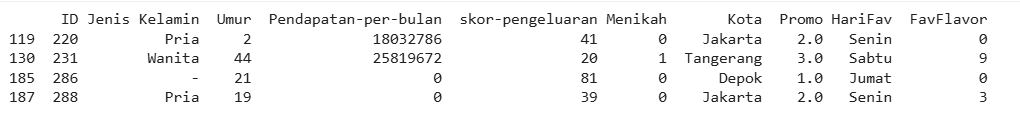

Catatan kami:

* Nilai umur = 2 tahun tidak logis jika dibandingkan dengan pendapatan per bulan sebesar 18 juta, sehingga besar kemungkinan terjadi kesalahan input di sisi sumber data.

* Ditemukan pendapatan = 0 pada beberapa entri, yang tidak masuk akal untuk pelanggan aktif.

* Nilai Jenis Kelamin = “–” menunjukkan adanya potensi anomali data.

* Nilai FavFlavor = 9, padahal berdasarkan definisi kategori yang kami miliki, skala FavFlavor hanya berkisar antara 0–8, sehingga ini termasuk out of range value.

Kami tidak bisa langsung memperbaiki data ini tanpa konfirmasi, karena penanganan yang salah bisa berdampak pada hasil analisis segmentasi dan model clustering.

## Missing Value

In [ ]:
df_final_clean.isna().sum()

,0
ID,0
Jenis Kelamin,4
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,12
Kota,0
Promo,6
HariFav,0
FavFlavor,0


In [ ]:
# Buat salinan dataset baru untuk eksperimen
df_final = df_final_clean.copy()

# Hapus baris yang missing di kolom 'Jenis Kelamin'
df_final = df_final.dropna(subset=['Jenis Kelamin'])

In [ ]:
# Imputasi kolom Menikah
df_final['Menikah'] = df_final['Menikah'].replace(['-', ' ', ''], np.nan)
df_final.loc[df_final['Menikah'].isna(), 'Menikah'] = \
    df_final.loc[df_final['Menikah'].isna(), 'Umur'].apply(lambda x: 1 if x > 25 else 0)

In [ ]:
df_final_clean['Promo'].value_counts(dropna=False)

,count
Promo,
1.0,85
3.0,50
2.0,41
0.0,14
NaN,6


In [ ]:
df_final_clean[df_final_clean['Promo'].isna()][['Pendapatan-per-bulan', 'skor-pengeluaran']]

,Pendapatan-per-bulan,skor-pengeluaran
10,11475409,54
64,10245901,42
95,29918032,86
132,819672,40
151,34426229,97
194,9836065,61


In [ ]:
df_final_clean.groupby('Promo')[['Pendapatan-per-bulan', 'skor-pengeluaran']].mean()

,Pendapatan-per-bulan,skor-pengeluaran
Promo,,
0.0,1.970140e+07,93.714286
1.0,1.836066e+07,65.988235
2.0,1.739304e+07,44.195122
3.0,2.088525e+07,15.980000


In [ ]:
# Imputasi kolom Promo
df_final['Promo'] = df_final['Promo'].replace(5.0, 3.0)
df_final.loc[df_final['Promo'].isna(), 'Promo'] = 1.0

In [ ]:
df_final.isna().sum()

,0
ID,0
Jenis Kelamin,0
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,0
Kota,0
Promo,0
HariFav,0
FavFlavor,0


**Penanganan Missing Value**


---


 * Missing value pada kolom Jenis Kelamin di hapus.
 * Missing value pada kolom Menikah, kami mengasumsikan berdasarkan umur: jika umur ≥ 25 dianggap sudah menikah, dan jika < 25 dianggap belum menikah.
 * Missing value pada kolom Promo, kami menghitung rata-rata pendapatan per bulan dan skor pengeluarannya, lalu mengimputasi dengan rata-rata pendapatan per bulan dan skor pengeluarannya menengah, yaitu 1.

## Mengubah Tipe Data

In [ ]:
# Cek kembali tipe data
print(df_final.dtypes)

# Pastikan tidak ada missing value
print(df_final.isna().sum())

# Cek duplikat
print("Jumlah duplikat:", df_final.duplicated().sum())

# Cek outlier numerik
df_final.describe()

ID                        int64
Jenis Kelamin            object
Umur                      int64
Pendapatan-per-bulan      int64
skor-pengeluaran          int64
Menikah                  object
Kota                     object
Promo                   float64
HariFav                  object
FavFlavor                 int64
dtype: object
ID                      0
Jenis Kelamin           0
Umur                    0
Pendapatan-per-bulan    0
skor-pengeluaran        0
Menikah                 0
Kota                    0
Promo                   0
HariFav                 0
FavFlavor               0
dtype: int64
Jumlah duplikat: 0


,ID,Umur,Pendapatan-per-bulan,skor-pengeluaran,Promo,FavFlavor
count,192.000000,192.000000,1.920000e+02,192.000000,192.000000,192.000000
mean,199.755208,37.510417,1.883325e+07,50.958333,1.630208,3.604167
std,57.861701,11.736188,1.075696e+07,26.170171,0.939936,2.726558
min,101.000000,18.000000,4.098360e+05,1.000000,0.000000,0.000000
25%,150.750000,29.000000,1.106557e+07,35.000000,1.000000,1.000000
50%,198.500000,36.000000,1.926230e+07,51.000000,1.000000,4.000000
75%,250.250000,47.250000,2.581967e+07,73.000000,2.250000,6.000000
max,300.000000,60.000000,5.000000e+07,100.000000,3.000000,8.000000


In [ ]:
# Ubah tipe data kolom sesuai kebutuhan
df_final['Jenis Kelamin'] = df_final['Jenis Kelamin'].astype('category')
df_final['Menikah'] = df_final['Menikah'].astype(int)
df_final['Kota'] = df_final['Kota'].astype('category')
df_final['Promo'] = df_final['Promo'].astype(int)
df_final['HariFav'] = df_final['HariFav'].astype('category')

# Cek hasil perubahan tipe data
print(df_final.dtypes)

ID                         int64
Jenis Kelamin           category
Umur                       int64
Pendapatan-per-bulan       int64
skor-pengeluaran           int64
Menikah                    int64
Kota                    category
Promo                      int64
HariFav                 category
FavFlavor                  int64
dtype: object


# EDA

In [ ]:
df_final.describe(include='all')

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
count,192.000000,192,192.000000,1.920000e+02,192.000000,192.000000,192,192.000000,192,192.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,NaN,7,NaN
top,NaN,Wanita,NaN,NaN,NaN,NaN,Jakarta,NaN,Senin,NaN
freq,NaN,108,NaN,NaN,NaN,NaN,84,NaN,64,NaN
mean,199.755208,NaN,37.510417,1.883325e+07,50.958333,0.880208,NaN,1.630208,NaN,3.604167
std,57.861701,NaN,11.736188,1.075696e+07,26.170171,0.325567,NaN,0.939936,NaN,2.726558
min,101.000000,NaN,18.000000,4.098360e+05,1.000000,0.000000,NaN,0.000000,NaN,0.000000
25%,150.750000,NaN,29.000000,1.106557e+07,35.000000,1.000000,NaN,1.000000,NaN,1.000000
50%,198.500000,NaN,36.000000,1.926230e+07,51.000000,1.000000,NaN,1.000000,NaN,4.000000
75%,250.250000,NaN,47.250000,2.581967e+07,73.000000,1.000000,NaN,2.250000,NaN,6.000000


In [ ]:
df_final.describe()

,ID,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Promo,FavFlavor
count,192.000000,192.000000,1.920000e+02,192.000000,192.000000,192.000000,192.000000
mean,199.755208,37.510417,1.883325e+07,50.958333,0.880208,1.630208,3.604167
std,57.861701,11.736188,1.075696e+07,26.170171,0.325567,0.939936,2.726558
min,101.000000,18.000000,4.098360e+05,1.000000,0.000000,0.000000,0.000000
25%,150.750000,29.000000,1.106557e+07,35.000000,1.000000,1.000000,1.000000
50%,198.500000,36.000000,1.926230e+07,51.000000,1.000000,1.000000,4.000000
75%,250.250000,47.250000,2.581967e+07,73.000000,1.000000,2.250000,6.000000
max,300.000000,60.000000,5.000000e+07,100.000000,1.000000,3.000000,8.000000


## Analisis Deskriptif dan Visualisasi Distribusi Data Numerik

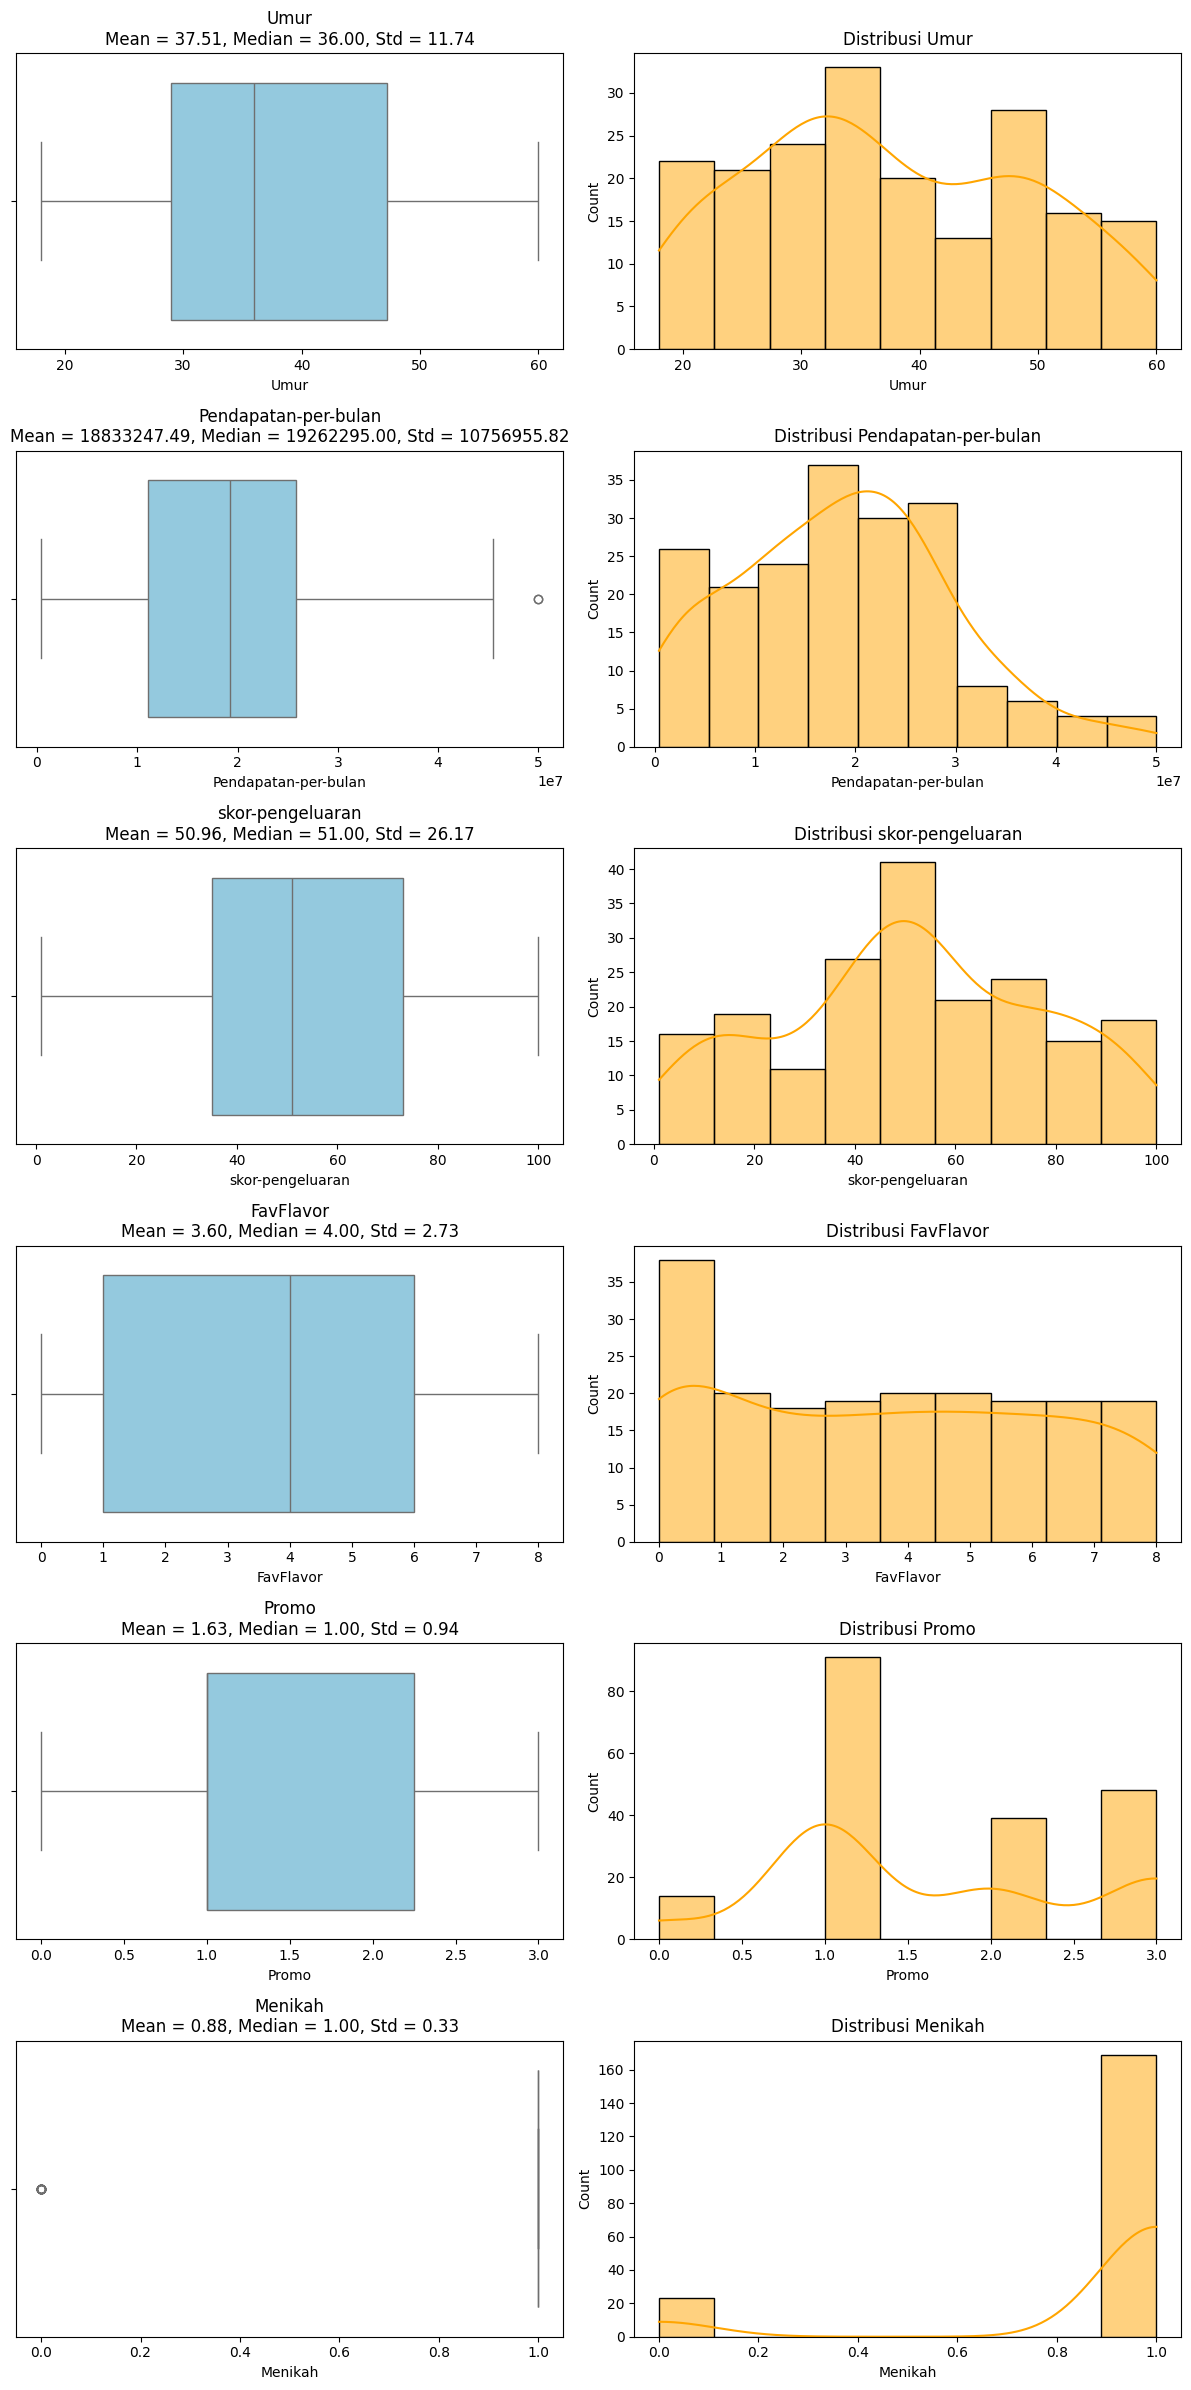

In [ ]:
numeric_cols = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran', 'FavFlavor', 'Promo', 'Menikah']

def observasi_num(features):
    fig, axs = plt.subplots(len(features), 2, figsize=(12, 4*len(features)))
    for i, kol in enumerate(features):
        sns.boxplot(x=df_final[kol], ax=axs[i, 0], color='skyblue')
        sns.histplot(df_final[kol], kde=True, ax=axs[i, 1], color='orange')

        axs[i, 0].set_title(f"{kol}\nMean = {df_final[kol].mean():.2f}, Median = {df_final[kol].median():.2f}, Std = {df_final[kol].std():.2f}")
        axs[i, 1].set_title(f"Distribusi {kol}")

    plt.tight_layout()
    plt.show()

numeric_cols = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran', 'FavFlavor', 'Promo', 'Menikah']
observasi_num(numeric_cols)


**Dari hasil di atas:**

- **Variabel Umur** memiliki nilai rata-rata (mean) sekitar 37,5 tahun dan median sebesar 36 tahun, yang menunjukkan bahwa sebaran data relatif simetris dan mendekati distribusi normal. Nilai standar deviasi sebesar 11,74 menandakan adanya variasi usia yang moderat di antara pelanggan. Dari boxplot juga terlihat bahwa tidak terdapat outlier yang ekstrem, sehingga rentang usia pelanggan berada dalam kisaran yang wajar, yaitu sekitar 18 hingga 60 tahun.
- **Variabel Pendapatan per bulan** memiliki nilai rata-rata (mean) sebesar Rp18.833.247,49 dan median sebesar Rp19.262.295,00. Kedua nilai ini relatif berdekatan, namun sebaran data terlihat sedikit condong ke kanan (right-skewed), yang berarti terdapat beberapa pelanggan dengan pendapatan lebih tinggi dari rata-rata. Nilai standar deviasi sebesar Rp10.756.955,82 menunjukkan bahwa variasi pendapatan antar pelanggan cukup tinggi.
Dari boxplot, tampak adanya beberapa outlier di sisi kanan, yang menunjukkan keberadaan pelanggan dengan pendapatan jauh di atas rata-rata. Secara umum, sebagian besar pelanggan memiliki pendapatan bulanan pada kisaran Rp5 juta hingga Rp30 juta.
- **Variabel Skor Pengeluaran** memiliki nilai rata-rata (mean) sebesar 50,96 dan median sebesar 51,00, yang menunjukkan bahwa distribusi data cukup simetris di sekitar nilai tengah. Nilai standar deviasi sebesar 26,18 menandakan bahwa variasi skor pengeluaran antar pelanggan cukup besar, ada pelanggan dengan skor rendah maupun sangat tinggi. Dari boxplot, sebaran terlihat merata tanpa adanya outlier yang ekstrem, sedangkan histogram menunjukkan bahwa distribusi cenderung mendekati normal meskipun terdapat sedikit variasi pada bagian tengah dan ekor distribusi. Sebagian besar pelanggan memiliki skor pengeluaran pada rentang 30 hingga 70.
- **Variabel FavFlavor** memiliki rata-rata (mean) sebesar 3,60, median sebesar 4,00, dan standar deviasi sebesar 2,73. Nilai mean dan median yang cukup berdekatan menunjukkan bahwa distribusi data cenderung seimbang tanpa adanya kemiringan (skewness) yang ekstrem.
Dari boxplot, terlihat bahwa sebaran data cukup merata tanpa outlier yang menonjol. Sementara pada histogram, tampak bahwa beberapa flavor memiliki jumlah peminat yang lebih tinggi (terutama pada kode 0–1), sedangkan flavor lainnya relatif tersebar secara merata hingga kode 8.
- **Variabel Promo** memiliki rata-rata (mean) sebesar 1,63, median sebesar 1,00, dan standar deviasi sebesar 0,94. Nilai mean yang sedikit lebih tinggi dari median menunjukkan bahwa distribusi data sedikit miring ke kanan (positively skewed), artinya sebagian besar pelanggan mendapatkan promo bernilai kecil (sekitar 1), namun ada sebagian yang mendapatkan promo lebih besar hingga 3. Dari boxplot, terlihat bahwa data tersebar dengan baik tanpa adanya outlier yang signifikan. Sementara pada histogram, tampak bahwa frekuensi tertinggi berada pada nilai promo 1, diikuti oleh 3, dan jumlah pelanggan dengan nilai promo 0 sangat sedikit. Hal ini menunjukkan bahwa mayoritas pelanggan menerima promo ringan atau standar, sementara promo tinggi relatif lebih jarang diberikan.
- **Variabel Menikah** memiliki rata-rata (mean) sebesar 0,88, median sebesar 1,00, dan standar deviasi sebesar 0,33. Karena nilai median dan mayoritas data berada pada 1, ini menunjukkan bahwa sebagian besar responden sudah menikah, sedangkan hanya sebagian kecil yang belum menikah (0). Pada boxplot, terlihat hanya ada sedikit variasi dengan satu titik outlier di sisi nol, menandakan bahwa data sangat condong pada satu kategori (menikah). Histogram juga memperkuat hal ini: distribusi sangat tidak seimbang (skewed ke kiri) karena dominasi kategori “1” (menikah).

## Distribusi Pelanggan

/tmp/ipython-input-495299374.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kota', data=df_final, palette='pastel')


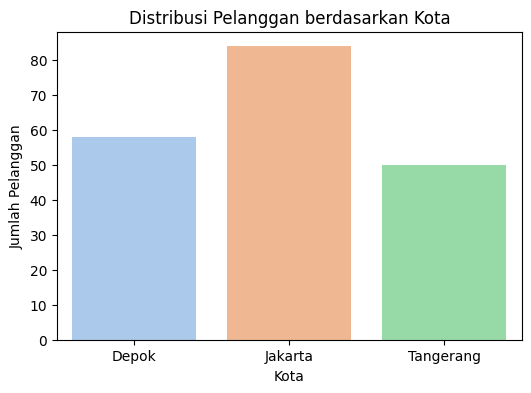

/tmp/ipython-input-495299374.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Jenis Kelamin', data=df_final, palette='Set2')


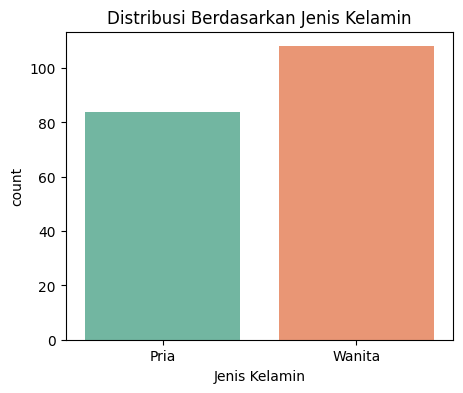

/tmp/ipython-input-495299374.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Menikah', data=df_final, palette='cool')


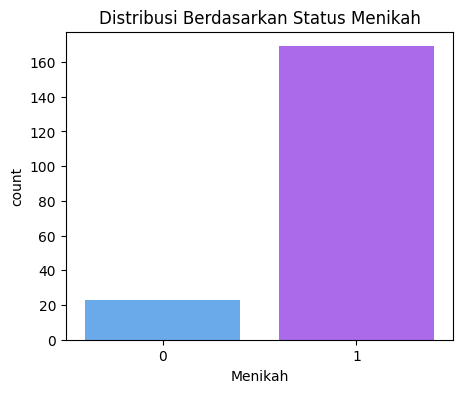

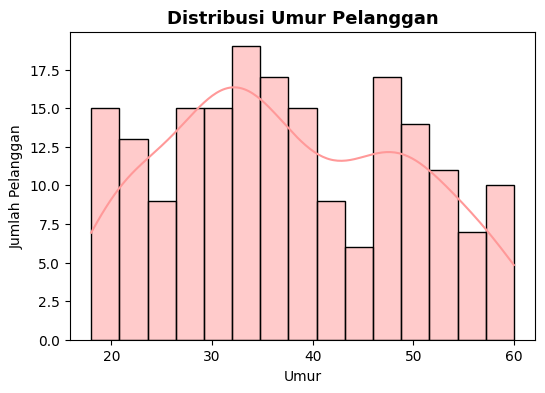

In [ ]:
# Distribusi Pelanggan berdasarkan Kota
plt.figure(figsize=(6,4))
sns.countplot(x='Kota', data=df_final, palette='pastel')
plt.title('Distribusi Pelanggan berdasarkan Kota')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Distribusi Pelanggan berdasarkan Jenis Kelamin
plt.figure(figsize=(5,4))
sns.countplot(x='Jenis Kelamin', data=df_final, palette='Set2')
plt.title('Distribusi Berdasarkan Jenis Kelamin')
plt.show()

# Distribusi Pelanggan berdasarkan Status Menikah
plt.figure(figsize=(5,4))
sns.countplot(x='Menikah', data=df_final, palette='cool')
plt.title('Distribusi Berdasarkan Status Menikah')
plt.show()

# Distribusi Umur Pelanggan
plt.figure(figsize=(6,4))
sns.histplot(df_final['Umur'], kde=True, bins=15, color="#FF9999", edgecolor="black")
plt.title('Distribusi Umur Pelanggan', fontsize=13, fontweight='bold')
plt.xlabel('Umur')
plt.ylabel('Jumlah Pelanggan')
plt.show()

***Distribusi Pelanggan Berdasarkan Kota***

Grafik menunjukkan bahwa mayoritas pelanggan MixITup berasal dari Jakarta, diikuti oleh Depok, dan paling sedikit dari Tangerang. Hal ini mengindikasikan bahwa cabang Jakarta memiliki basis pelanggan terbesar dan kemungkinan tingkat awareness atau aktivitas pemasaran tertinggi. MixITup dapat memanfaatkan temuan ini untuk memperkuat strategi ekspansi di Jakarta atau menambah promosi di Tangerang agar seimbang.

***Distribusi Berdasarkan Jenis Kelamin***

Dari grafik terlihat bahwa pelanggan wanita lebih banyak dibandingkan pelanggan pria. Ini menunjukkan bahwa produk MixITup lebih menarik bagi segmen wanita, kemungkinan karena preferensi terhadap dessert dan minuman manis yang lebih tinggi pada kelompok ini. Strategi pemasaran dapat diarahkan dengan pendekatan gaya hidup dan visual yang lebih sesuai dengan audiens wanita.

***Distribusi Berdasarkan Status Menikah***

Sebagian besar pelanggan MixITup berstatus menikah, sedangkan pelanggan yang belum menikah jumlahnya relatif sedikit. Hal ini mungkin menunjukkan bahwa produk MixITup populer di kalangan keluarga muda atau pasangan yang sering membeli untuk dinikmati bersama. Strategi promosi seperti “Family Package” atau “Couple Discount” dapat menjadi ide menarik.

***Distribusi Umur Pelanggan***

Distribusi umur pelanggan terlihat cukup merata dengan puncak pada rentang usia 30–40 tahun, yang menandakan bahwa pelanggan utama MixITup berasal dari kalangan dewasa muda dan pekerja produktif. Segmen ini memiliki daya beli stabil dan cenderung mencari kenyamanan serta kualitas. MixITup dapat menargetkan promosi digital di platform yang sering digunakan kelompok usia ini seperti Instagram atau TikTok

## Preferensi Produk

### Distribusi Flavor Favorit Pelanggan


Produk Favorit:
 FavFlavor_Name
Vanilla                   38
Coconut                   20
Strawberry                20
BubbleGum/Cotton Candy    20
Mix 3 Flavors             19
BlueBerry                 19
Mix 2 Flavors             19
Caramel Pecan             19
Cokelat                   18
Name: count, dtype: int64


/tmp/ipython-input-4263075097.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


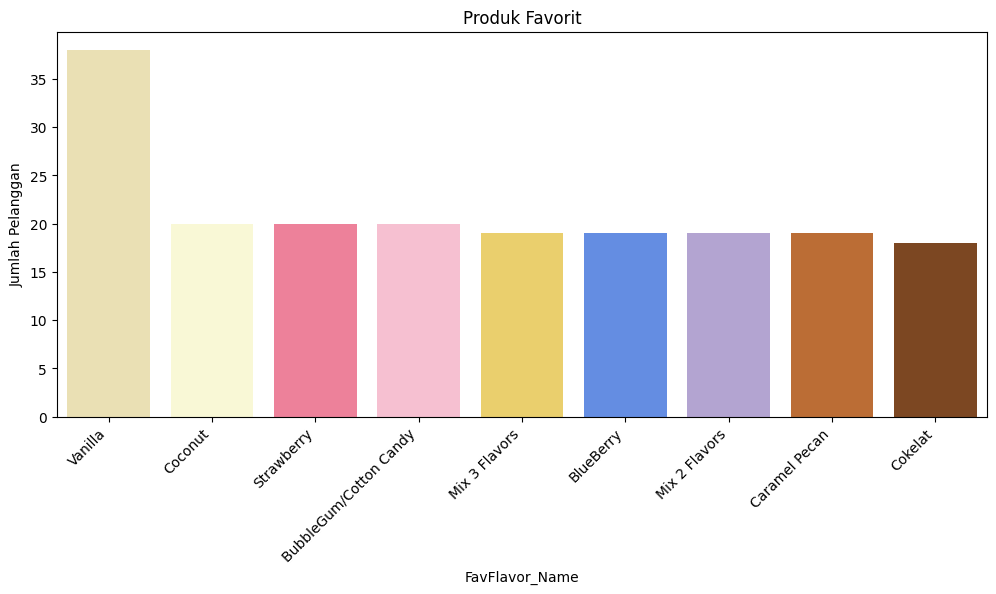

In [ ]:
# Mapping angka ke nama flavor
flavor_map = {
    0: "Vanilla",
    1: "Strawberry",
    2: "Cokelat",
    3: "BlueBerry",
    4: "BubbleGum/Cotton Candy",
    5: "Coconut",
    6: "Caramel Pecan",
    7: "Mix 2 Flavors",
    8: "Mix 3 Flavors"
}

# Terapkan mapping
df_final['FavFlavor_Name'] = df_final['FavFlavor'].map(flavor_map)

# Hitung jumlah per flavor
product_count = df_final['FavFlavor_Name'].value_counts()
print("\nProduk Favorit:\n", product_count)

# Buat warna sesuai flavor
flavor_colors = {
    "Vanilla":"#F3E5AB",            # Kuning pucat
    "Strawberry":"#FF6F91",         # Pink/merah muda
    "Cokelat":"#8B4513",            # Cokelat
    "BlueBerry":"#4F86F7",          # Biru
    "BubbleGum/Cotton Candy":"#FFB7CE", # Bubblegum pink
    "Coconut":"#FFFDD0",            # Cream
    "Caramel Pecan":"#D2691E",      # Caramel/cokelat tua
    "Mix 2 Flavors":"#B19CD9",      # Ungu muda
    "Mix 3 Flavors":"#FFDB58"       # Kuning cerah
}

# Visualisasi dengan warna sesuai flavor
plt.figure(figsize=(12,5))
sns.barplot(
    x=product_count.index,
    y=product_count.values,
    palette=[flavor_colors[f] for f in product_count.index]
)
plt.xticks(rotation=45, ha='right')
plt.title("Produk Favorit")
plt.ylabel("Jumlah Pelanggan")
plt.show()

Grafik menunjukkan bahwa varian Vanilla menjadi rasa paling favorit dengan jumlah pelanggan tertinggi, jauh melampaui rasa lainnya. Varian seperti Coconut, Strawberry, dan Bubblegum/Cotton Candy menempati posisi menengah, sedangkan Cokelat, Caramel Pecan, dan kombinasi rasa (Mix 2–3 Flavors) memiliki jumlah penggemar yang relatif seimbang namun lebih rendah.

Temuan ini menunjukkan bahwa pelanggan MixITup cenderung menyukai rasa klasik dan ringan seperti Vanilla. Strategi yang bisa dilakukan adalah memperkuat promosi rasa Vanilla, sekaligus menyoroti varian baru dengan basis rasa serupa (misalnya Vanilla Latte atau Vanilla Almond). Selain itu, rasa dengan peminat sedang dapat ditingkatkan dengan bundling atau promo khusus untuk meningkatkan minat coba dari pelanggan baru.

### Hari Favorit Pelanggan Membeli

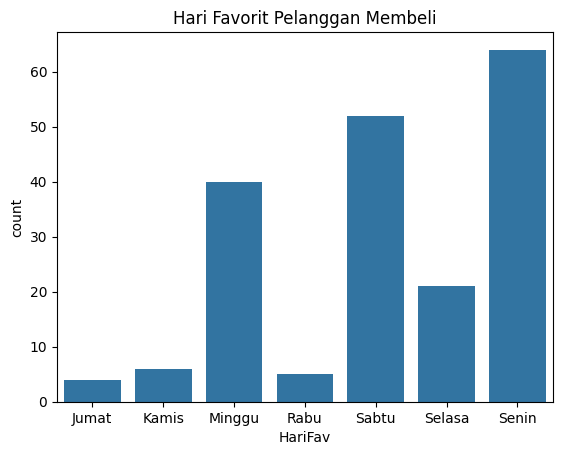

In [ ]:
sns.countplot(x='HariFav', data=df_final)
plt.title('Hari Favorit Pelanggan Membeli')
plt.show()

Grafik menunjukkan bahwa **hari Senin menjadi hari dengan jumlah pembelian tertinggi** oleh pelanggan MixITup, diikuti oleh Sabtu dan Minggu. Hal ini menandakan bahwa pelanggan cenderung melakukan pembelian di awal minggu serta saat akhir pekan, kemungkinan karena suasana santai atau waktu luang lebih banyak.
Sebaliknya, pembelian paling rendah terjadi pada hari Rabu, Kamis, dan Jumat, yang mungkin disebabkan oleh padatnya aktivitas kerja atau sekolah.

**Temuan ini dapat menjadi acuan bagi MixITup untuk:**

- Mengoptimalkan promo pertengahan minggu (midweek promo) guna meningkatkan penjualan di hari sepi.
- Memperkuat strategi stok dan tenaga kerja di hari-hari dengan traffic tinggi seperti Senin dan akhir pekan agar pelayanan tetap optimal.

### Heatmap kombinasi HariFav vs FavFlavor

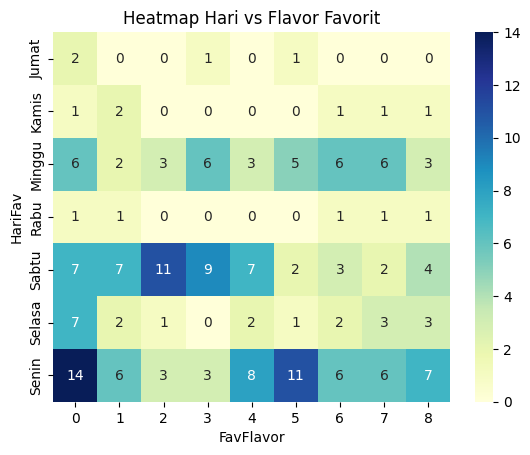

In [ ]:
heat_data = pd.crosstab(df_final['HariFav'], df_final['FavFlavor'])
sns.heatmap(heat_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap Hari vs Flavor Favorit')
plt.show()

Heatmap ini menggambarkan hubungan antara hari pembelian pelanggan dan rasa es krim favorit mereka.
Terlihat bahwa:

* Rasa Vanilla (kode 0) dan Mix 3 Flavors (kode 4) paling sering dibeli pada hari Senin dan Sabtu, dengan intensitas pembelian tertinggi (warna biru tua).

* Rasa BlueBerry (kode 5) dan Cokelat (kode 8) juga cukup populer di hari-hari tersebut, meskipun frekuensinya lebih rendah.

* Sementara itu, hari kerja seperti Rabu dan Kamis menunjukkan aktivitas pembelian yang rendah di semua varian rasa.

Interpretasi ini menunjukkan bahwa pelanggan cenderung membeli varian rasa populer di awal dan akhir minggu, terutama Vanilla dan kombinasi rasa (Mix Flavors).

**Strategi yang dapat diambil MixITup:**
- Fokuskan stok dan promosi rasa populer (Vanilla & Mix Flavors) di hari Senin dan akhir pekan.
- Gunakan promo khusus rasa kurang populer di pertengahan minggu untuk menyeimbangkan permintaan dan menarik pelanggan baru.

## Perilaku Pembelian

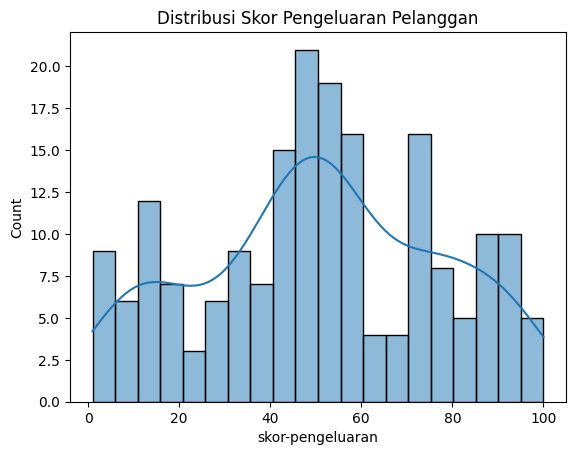

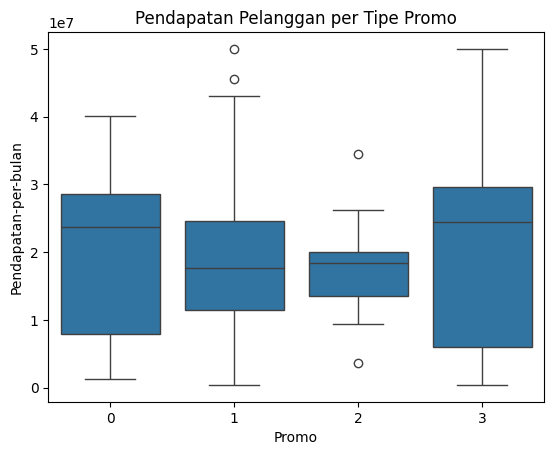

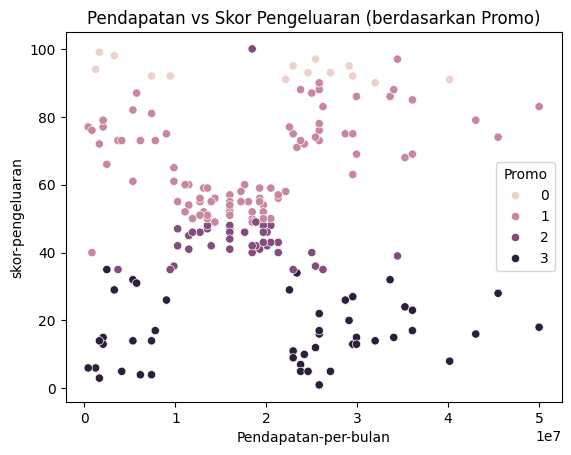

In [ ]:
# Histogram skor-pengeluaran
sns.histplot(df_final['skor-pengeluaran'], bins=20, kde=True)
plt.title('Distribusi Skor Pengeluaran Pelanggan')
plt.show()

# Boxplot Pendapatan per Promo
sns.boxplot(x='Promo', y='Pendapatan-per-bulan', data=df_final)
plt.title('Pendapatan Pelanggan per Tipe Promo')
plt.show()

# Scatterplot Pendapatan vs Pengeluaran
sns.scatterplot(x='Pendapatan-per-bulan', y='skor-pengeluaran', hue='Promo', data=df_final)
plt.title('Pendapatan vs Skor Pengeluaran (berdasarkan Promo)')
plt.show()

**Distribusi Skor Pengeluaran Pelanggan**

Grafik histogram menunjukkan bahwa skor pengeluaran pelanggan tersebar cukup merata antara 0 hingga 100, dengan puncak konsentrasi di sekitar skor 40–60. Ini berarti sebagian besar pelanggan memiliki tingkat pengeluaran menengah, sedangkan pelanggan dengan pengeluaran sangat tinggi atau sangat rendah jumlahnya relatif lebih sedikit. Distribusi ini bisa mengindikasikan bahwa mayoritas pelanggan MixITup tergolong pelanggan reguler, bukan pelanggan dengan perilaku belanja ekstrem.

**Pendapatan Pelanggan per Tipe Promo**

Boxplot menunjukkan perbandingan pendapatan bulanan pelanggan berdasarkan frekuensi penggunaan promo (0–3). Pelanggan dengan kode promo 0 (tidak pernah menggunakan promo) dan promo 3 (sering menggunakan promo) memiliki variasi pendapatan yang cukup tinggi. Median pendapatan cenderung serupa di semua kategori, namun kelompok promo 3 menunjukkan dispersi yang paling besar, menandakan promo menarik pelanggan dari berbagai level pendapatan. Hal ini dapat diartikan bahwa penggunaan promo tidak terbatas pada pelanggan berpendapatan rendah saja, melainkan juga menarik pelanggan berpendapatan menengah hingga tinggi, menandakan efektivitas strategi promo MixITup dalam menjangkau berbagai segmen.

**Pendapatan vs Skor Pengeluaran (berdasarkan Promo**)

Scatter plot ini memperlihatkan hubungan antara pendapatan pelanggan dan skor pengeluaran, dengan warna merepresentasikan tipe promo.

Tampak bahwa:
- Tidak ada hubungan linear yang kuat antara pendapatan dan skor pengeluaran; pelanggan dengan pendapatan tinggi belum tentu memiliki skor pengeluaran tinggi.
- Promo (terutama tipe 1 dan 3) muncul di seluruh rentang skor, menandakan bahwa promosi memengaruhi perilaku pengeluaran di semua tingkat pendapatan.

**Insight yang dapat diambil:**
MixITup dapat terus menggunakan promo sebagai strategi utama untuk menjaga engagement pelanggan lintas segmen, sambil mempertimbangkan pendekatan personalisasi agar promo lebih relevan bagi kelompok pelanggan tertentu.

## Analisis Promo

In [ ]:
# Cek rata-rata penggunaan promo per kategori
promo_gender = df_final.groupby('Jenis Kelamin')['Promo'].mean().sort_values(ascending=False)
promo_city = df_final.groupby('Kota')['Promo'].mean().sort_values(ascending=False)
promo_umur = df_final.groupby('Umur')['Promo'].mean().sort_values(ascending=False)
promo_skor = df_final.groupby('Promo')['skor-pengeluaran'].mean().sort_values(ascending=False)

/tmp/ipython-input-1578468924.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promo_gender = df_final.groupby('Jenis Kelamin')['Promo'].mean().sort_values(ascending=False)
/tmp/ipython-input-1578468924.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promo_city = df_final.groupby('Kota')['Promo'].mean().sort_values(ascending=False)


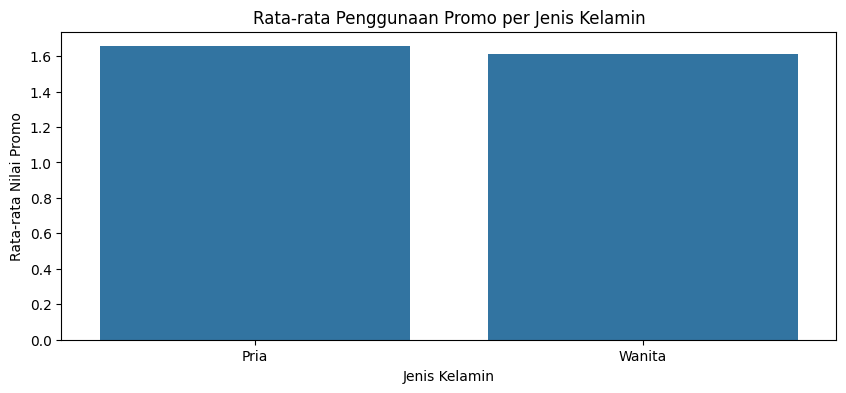

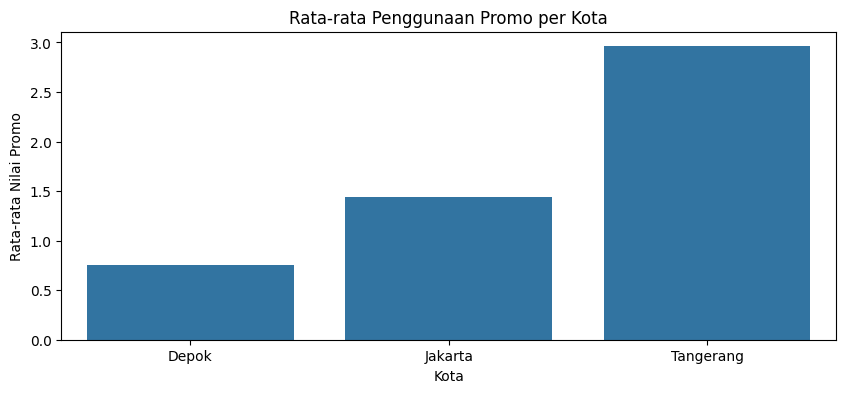

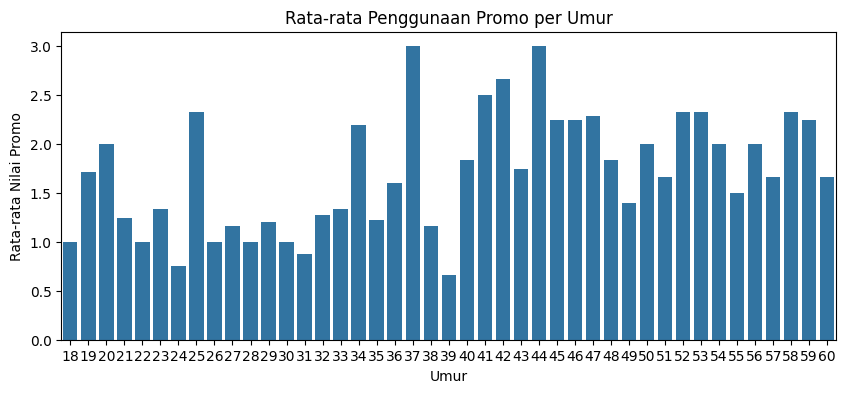

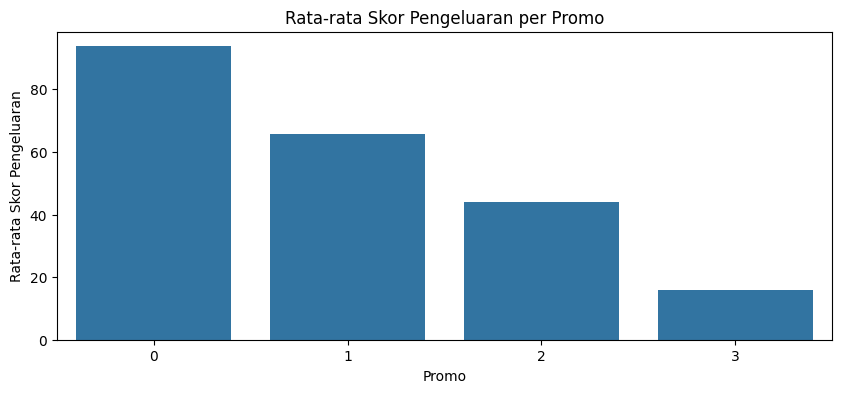

In [ ]:
# Visualisasi
plt.figure(figsize=(10,4))
sns.barplot(x=promo_gender.index, y=promo_gender.values)
plt.title("Rata-rata Penggunaan Promo per Jenis Kelamin")
plt.ylabel("Rata-rata Nilai Promo")
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(x=promo_city.index, y=promo_city.values)
plt.title("Rata-rata Penggunaan Promo per Kota")
plt.ylabel("Rata-rata Nilai Promo")
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(x=promo_umur.index, y=promo_umur.values)
plt.title("Rata-rata Penggunaan Promo per Umur")
plt.ylabel("Rata-rata Nilai Promo")
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(x=promo_skor.index, y=promo_skor.values)
plt.title('Rata-rata Skor Pengeluaran per Promo')
plt.ylabel("Rata-rata Skor Pengeluaran") # Corrected ylabel
plt.show()

**Rata-rata Penggunaan Promo per Jenis Kelamin**

Grafik pertama menunjukkan bahwa rata-rata penggunaan promo antara pria dan wanita relatif sama, dengan nilai yang sangat berdekatan. Hal ini mengindikasikan bahwa jenis kelamin tidak memiliki pengaruh yang signifikan terhadap frekuensi penggunaan promo, baik pria maupun wanita sama-sama cenderung memanfaatkan promo yang tersedia.

**Rata-rata Penggunaan Promo per Kota**

Grafik kedua memperlihatkan perbedaan yang cukup mencolok antar kota. Kota Tangerang memiliki rata-rata penggunaan promo tertinggi, diikuti oleh Jakarta, sedangkan Depok memiliki rata-rata terendah. Ini dapat menunjukkan bahwa pelanggan di Tangerang lebih responsif terhadap promo dibandingkan dengan dua kota lainnya.

**Rata-rata Penggunaan Promo per Umur**

Grafik ketiga menunjukkan variasi penggunaan promo di berbagai kelompok umur. Terlihat bahwa pengguna dengan rentang usia sekitar 38–45 tahun cenderung memiliki rata-rata penggunaan promo yang lebih tinggi dibandingkan usia lainnya. Hal ini mungkin menunjukkan bahwa kelompok usia produktif lebih aktif memanfaatkan promo, mungkin karena daya beli dan kebutuhan konsumsi yang lebih tinggi.

**Rata-rata Skor Pengeluaran per Promo**

Grafik terakhir memperlihatkan bahwa semakin tinggi nilai promo yang digunakan, semakin rendah rata-rata skor pengeluaran pelanggan. Hal ini mengindikasikan bahwa pelanggan yang sering menggunakan promo cenderung mengeluarkan biaya lebih sedikit, yang sesuai dengan tujuan promo yaitu memberikan potongan harga dan mendorong pembelian dengan biaya lebih hemat.


Korelasi antara Promo dan Skor Pengeluaran: -0.90


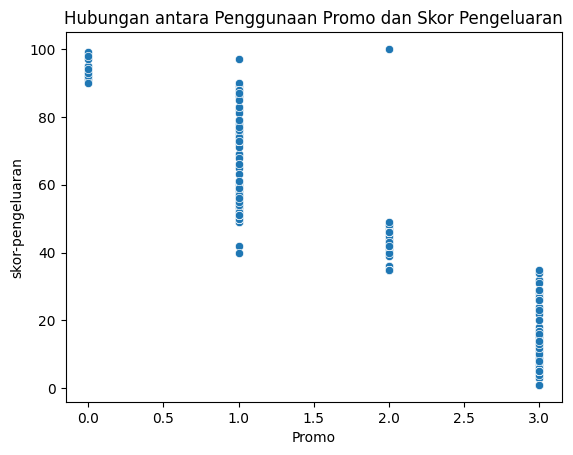

In [ ]:
# Menggunakan skor-pengeluaran sebagai proksi frekuensi beli
corr = df_final['Promo'].corr(df_final['skor-pengeluaran'])
print(f"Korelasi antara Promo dan Skor Pengeluaran: {corr:.2f}")

# Visualisasi hubungan
sns.scatterplot(x='Promo', y='skor-pengeluaran', data=df_final)
plt.title("Hubungan antara Penggunaan Promo dan Skor Pengeluaran")
plt.show()

Grafik scatter plot ini menunjukkan hubungan antara jumlah penggunaan promo dan skor pengeluaran pelanggan. Dari visualisasi dan nilai korelasi sebesar -0.90, terlihat bahwa terdapat hubungan negatif yang sangat kuat antara kedua variabel tersebut. Artinya, semakin sering pelanggan menggunakan promo (nilai promo semakin tinggi), semakin rendah skor pengeluaran mereka. Dengan kata lain, pelanggan yang memanfaatkan promo cenderung membelanjakan uang lebih sedikit dibandingkan pelanggan yang jarang menggunakan promo. Hal ini menunjukkan efektivitas promo dalam menarik pelanggan yang sensitif terhadap harga, namun juga mengindikasikan bahwa penggunaan promo bisa menurunkan total nilai transaksi rata-rata.


## Korelasi Numerik

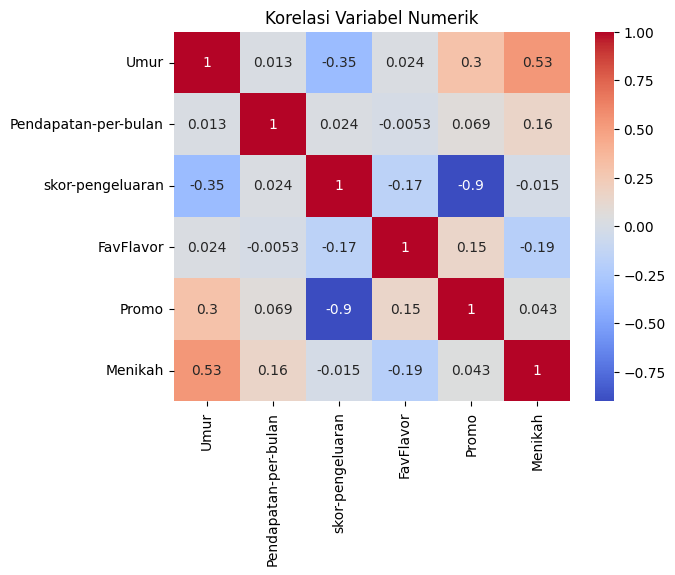

In [ ]:
numeric_cols = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran', 'FavFlavor', 'Promo', 'Menikah']
sns.heatmap(df_final[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Variabel Numerik')
plt.show()

Heatmap ini menggambarkan kekuatan dan arah hubungan antar variabel numerik dalam dataset. Terlihat bahwa variabel Promo dan Skor Pengeluaran memiliki korelasi negatif yang sangat kuat sebesar -0.9, artinya semakin sering promo digunakan, semakin rendah skor pengeluaran pelanggan — selaras dengan temuan sebelumnya. Selain itu, Umur dan Status Menikah memiliki korelasi positif cukup kuat (0.53), menunjukkan bahwa semakin tua seseorang, semakin besar kemungkinan mereka sudah menikah.

Hubungan antar variabel lainnya relatif lemah (nilai korelasi mendekati nol), seperti antara Pendapatan per Bulan dengan variabel lain yang menunjukkan korelasi sangat kecil. Ini berarti sebagian besar variabel dalam dataset tidak memiliki hubungan linear yang kuat satu sama lain, kecuali pasangan Promo–Skor Pengeluaran dan Umur–Menikah.

# Standarisasi Kolom Numerik

In [ ]:
# Statistik sebelum Standarisasi
print('Statistik sebelum Standarisasi\n')
print(df_final[numeric_cols].describe().round(1))

# Standarisasi
df_final_std = StandardScaler().fit_transform(df_final[numeric_cols])

# Membuat DataFrame
df_final_std = pd.DataFrame(data=df_final_std, index=df_final.index, columns=df_final[numeric_cols].columns)

# Menampilkan contoh isi data dan summary statistik
print('\nHasil Standarisasi\n')
print(df_final_std.head())

print('\nStatistik Hasil Standarisasi\n')
print(df_final_std.describe().round(0))

Statistik sebelum Standarisasi

        Umur  Pendapatan-per-bulan  skor-pengeluaran  FavFlavor  Promo  \
count  192.0                 192.0             192.0      192.0  192.0   
mean    37.5            18833247.5              51.0        3.6    1.6   
std     11.7            10756955.8              26.2        2.7    0.9   
min     18.0              409836.0               1.0        0.0    0.0   
25%     29.0            11065573.0              35.0        1.0    1.0   
50%     36.0            19262295.0              51.0        4.0    1.0   
75%     47.2            25819672.0              73.0        6.0    2.2   
max     60.0            50000000.0             100.0        8.0    3.0   

       Menikah  
count    192.0  
mean       0.9  
std        0.3  
min        0.0  
25%        1.0  
50%        1.0  
75%        1.0  
max        1.0  

Hasil Standarisasi

       Umur  Pendapatan-per-bulan  skor-pengeluaran  FavFlavor     Promo  \
0  0.981547             -0.532999          0.039908

Setelah dilakukan standarisasi, setiap variabel memiliki rata-rata mendekati nol dan simpangan baku sekitar satu. Proses ini menyetarakan skala antar variabel sehingga tidak ada variabel yang mendominasi karena perbedaan satuan atau rentang nilai. Data yang telah distandarisasi memiliki distribusi yang seimbang di sekitar nol, sehingga seluruh variabel dapat berkontribusi secara proporsional dalam analisis maupun pemodelan selanjutnya.

In [ ]:
# Menggabungkan data frame
df_final2 = df_final_std.merge(df_final, left_index = True, right_index=True, how = 'left')
print(df_final2.head())

# Cek kolom df_final2
print(df_final2.columns)

# Menghapus salah satu kolom dengan nama yang sama
# Ganti `'Umur_y'` dengan nama kolom sebenarnya yang muncul dari hasil `df_final2.columns`.
df_final2.drop(columns=['Umur_y'], inplace=True)  # Menghapus kolom Umur yang asli, bukan Umur_y
df_final2.rename(columns={'Umur_x': 'Umur'}, inplace=True) # Rename Umur_x to Umur

# Demikian pula untuk kolom lainnya, periksa terlebih dahulu nama kolom yang sebenarnya dengan menggunakan perintah df_final2.columns
# Lalu sesuaikan pernyataan drop dan rename-nya sesuai kebutuhan.
df_final2.drop(columns=['Pendapatan-per-bulan_y'], inplace=True)
df_final2.rename(columns={'Pendapatan-per-bulan_x': 'Pendapatan-per-bulan'}, inplace=True)
df_final2.drop(columns=['skor-pengeluaran_y'], inplace=True)
df_final2.rename(columns={'skor-pengeluaran_x': 'skor-pengeluaran'}, inplace=True)

     Umur_x  Pendapatan-per-bulan_x  skor-pengeluaran_x  FavFlavor_x  \
0  0.981547               -0.532999            0.039908    -0.589887   
1 -0.470751                1.376963            1.342493     0.881000   
2  1.152406               -0.265604           -0.381517    -0.222165   
3 -1.581332               -0.571198            0.154842     1.248721   
4  0.041825                0.116388           -0.343206     1.616443   

    Promo_x  Menikah_x   ID Jenis Kelamin  Umur_y  Pendapatan-per-bulan_y  \
0 -0.672233   0.368910  101        Wanita      49                13114754   
1 -0.672233   0.368910  102        Wanita      32                33606557   
2  0.394451   0.368910  103          Pria      51                15983606   
3 -0.672233  -2.710687  104          Pria      19                12704918   
4  0.394451   0.368910  105        Wanita      38                20081967   

   skor-pengeluaran_y  Menikah_y     Kota  Promo_y HariFav  FavFlavor_y  \
0                  52        

**Kode ini digunakan untuk:**
- Menggabungkan data hasil standarisasi dan data asli ke dalam satu DataFrame (df_final2).
- Menghapus kolom duplikat agar tidak ada dua kolom dengan nama sama.
- Menjaga konsistensi nama kolom, supaya mudah digunakan dalam analisis berikutnya.

# Konversi Kategorik Data dengan Label Encoder

In [ ]:
# Define categorical columns
kolom_kategorik = ['Jenis Kelamin', 'Kota', 'HariFav']

# Membuat salinan data frame
df_final_encode = df_final[kolom_kategorik].copy()

# Melakukan labelEncoder untuk semua kolom kategorik
for col in kolom_kategorik:
    df_final_encode[col] = LabelEncoder().fit_transform(df_final_encode[col])

# Menampilkan data
print(df_final_encode.head())

   Jenis Kelamin  Kota  HariFav
0              1     1        4
1              1     0        2
2              0     1        2
3              0     1        3
4              1     1        6


Proses Label Encoding berhasil mengubah variabel kategorik menjadi bentuk numerik agar dapat digunakan dalam analisis statistik atau algoritma machine learning (yang umumnya hanya menerima input numerik).

Setiap kategori unik kini direpresentasikan oleh angka, sehingga data menjadi lebih efisien untuk diolah. Namun, perlu diingat bahwa LabelEncoder memberi urutan numerik buatan (misalnya 0, 1, 2), sehingga cocok digunakan untuk variabel kategorik tanpa urutan alami (nominal) seperti Jenis Kelamin atau Kota.

# Persiapan Data Model

In [ ]:
# Menggabungkan data frame
df_final_model = df_final_encode.merge(df_final_std, left_index = True, right_index=True, how = 'left')
print(df_final_model.head())

   Jenis Kelamin  Kota  HariFav      Umur  Pendapatan-per-bulan  \
0              1     1        4  0.981547             -0.532999   
1              1     0        2 -0.470751              1.376963   
2              0     1        2  1.152406             -0.265604   
3              0     1        3 -1.581332             -0.571198   
4              1     1        6  0.041825              0.116388   

   skor-pengeluaran  FavFlavor     Promo   Menikah  
0          0.039908  -0.589887 -0.672233  0.368910  
1          1.342493   0.881000 -0.672233  0.368910  
2         -0.381517  -0.222165  0.394451  0.368910  
3          0.154842   1.248721 -0.672233 -2.710687  
4         -0.343206   1.616443  0.394451  0.368910  


In [ ]:
df_final_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         192 non-null    int64  
 1   Kota                  192 non-null    int64  
 2   HariFav               192 non-null    int64  
 3   Umur                  192 non-null    float64
 4   Pendapatan-per-bulan  192 non-null    float64
 5   skor-pengeluaran      192 non-null    float64
 6   FavFlavor             192 non-null    float64
 7   Promo                 192 non-null    float64
 8   Menikah               192 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 15.0 KB


Setelah dilakukan standarisasi, setiap variabel memiliki rata-rata mendekati nol dan simpangan baku sekitar satu. Proses ini menyetarakan skala antar variabel sehingga tidak ada variabel yang mendominasi karena perbedaan satuan atau rentang nilai. Data yang telah distandarisasi memiliki distribusi yang seimbang di sekitar nol, sehingga seluruh variabel dapat berkontribusi secara proporsional dalam analisis maupun pemodelan selanjutnya.

# Clustering

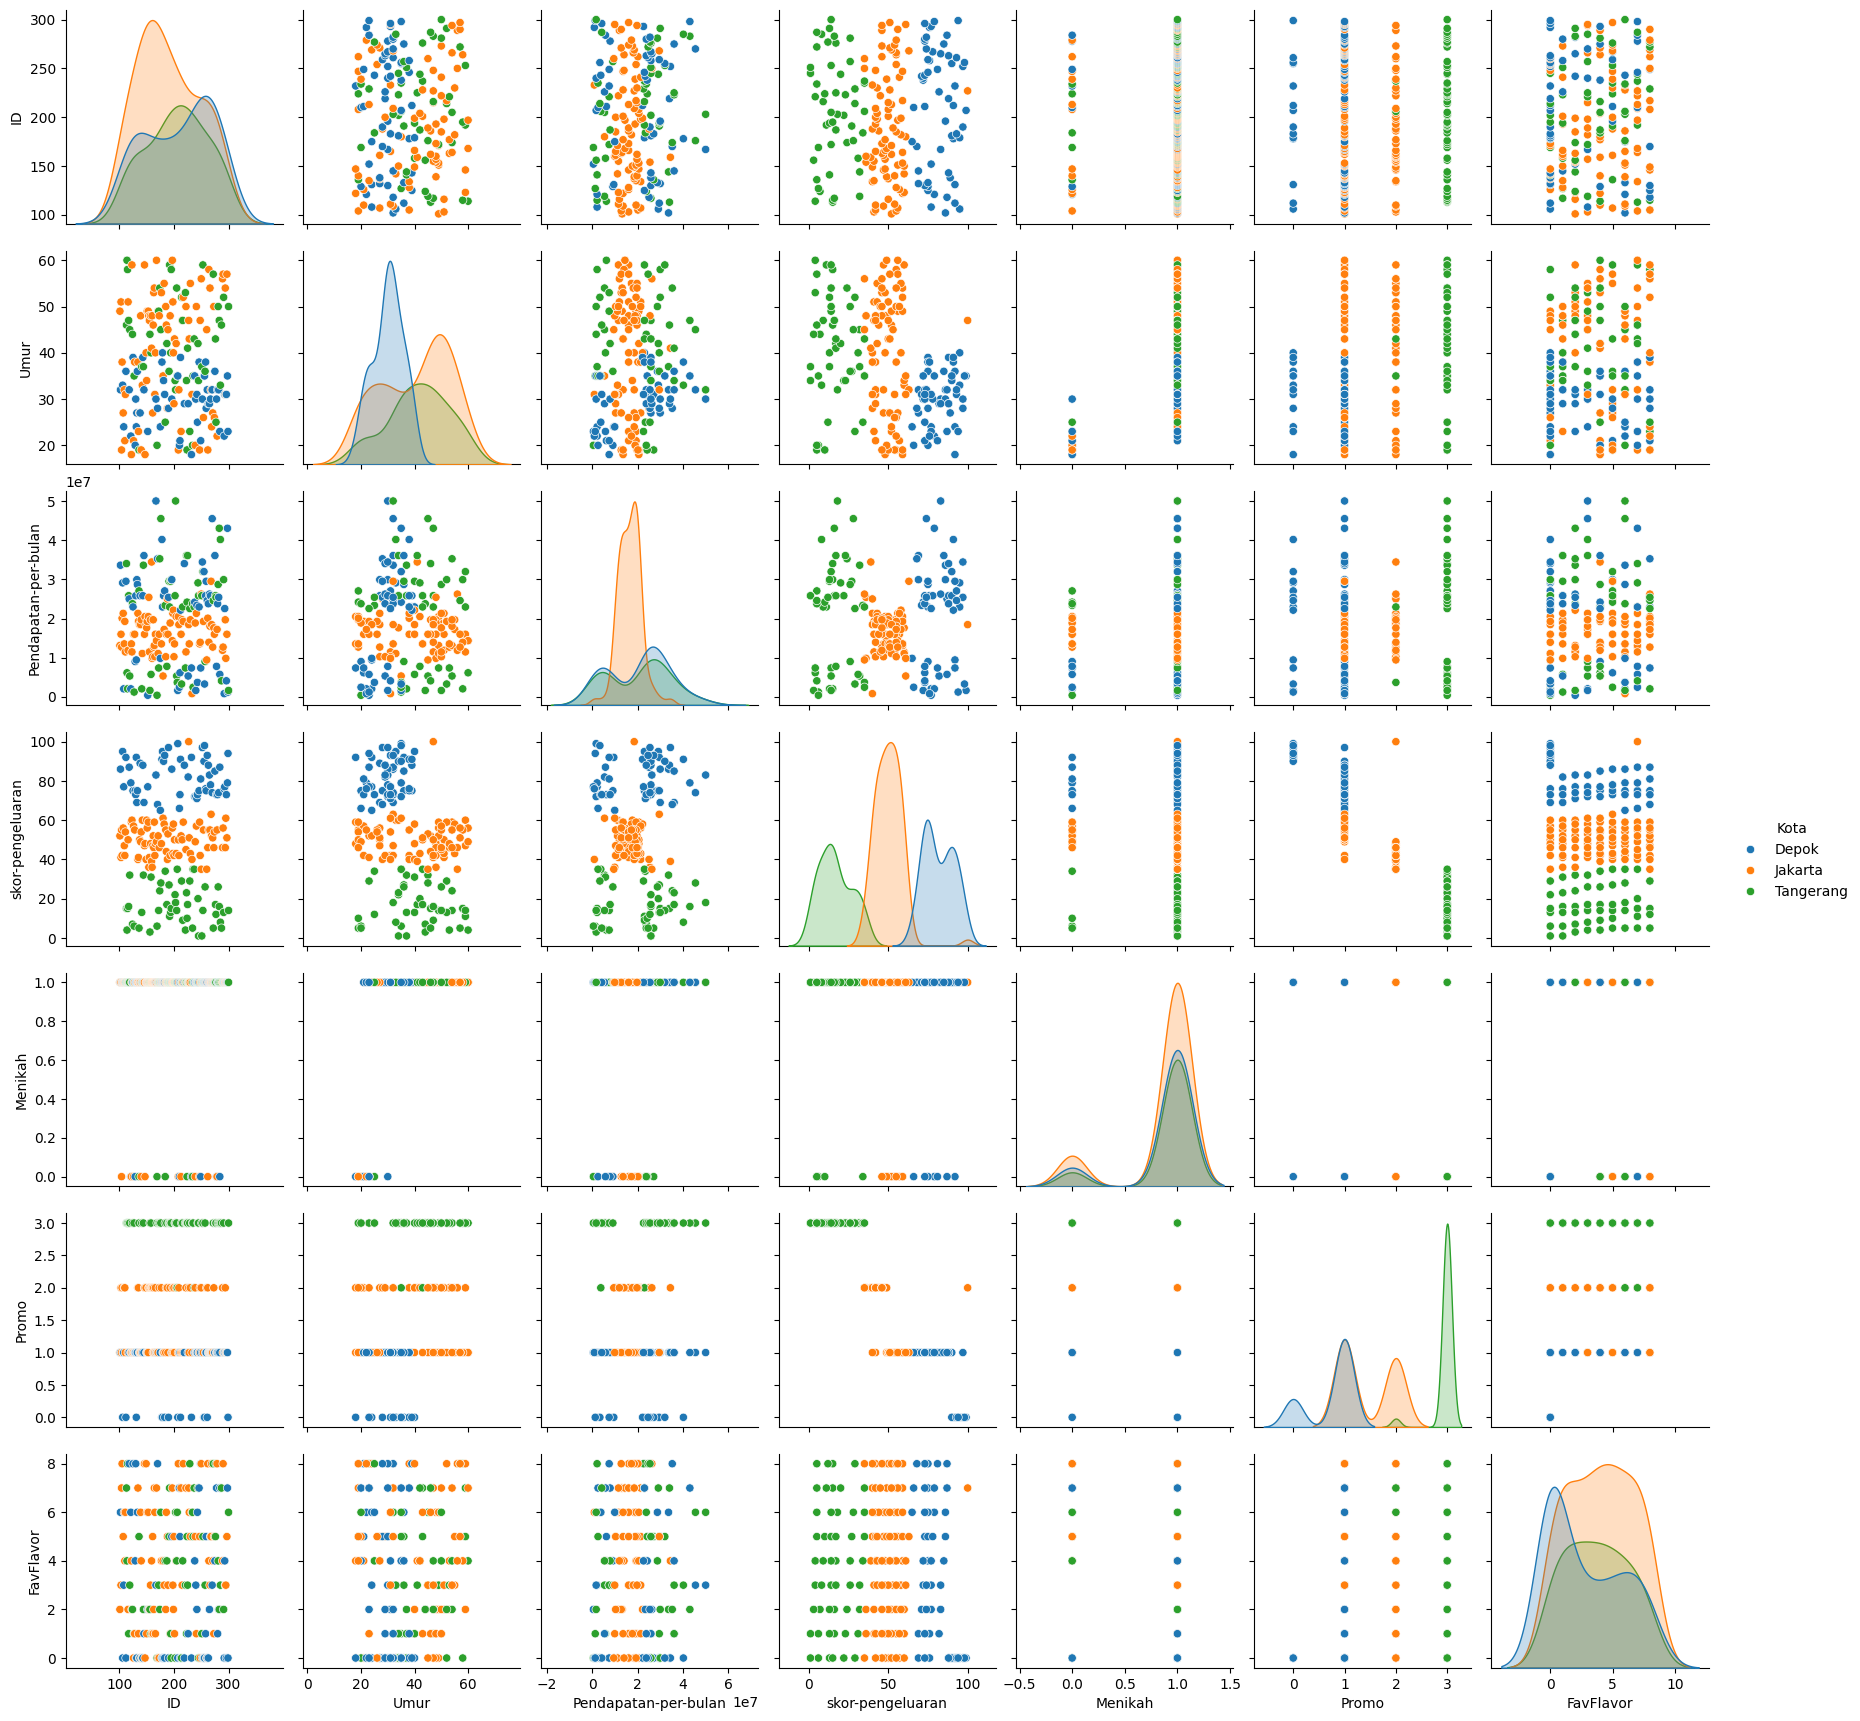

In [ ]:
sns.pairplot(df_final, hue='Kota')

In [ ]:
features = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran', 'FavFlavor', 'Promo']
X = df_final[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Text(0.5, 1.0, 'Elbow curve')

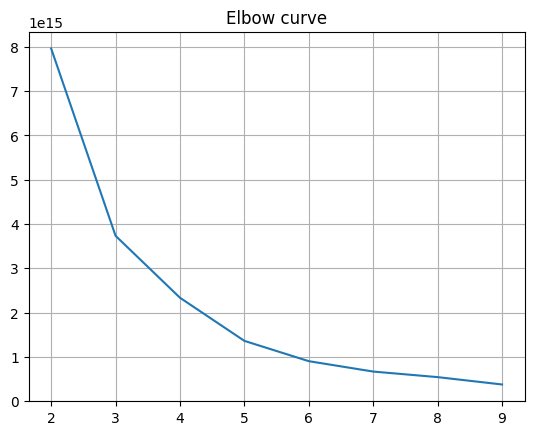

In [ ]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k, random_state=42).fit(X)
    distorsions.append(kmeans.inertia_)

plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve') # MEREKOMENDASIKAN BERAPA CLUSTER YANG BISA DIBUAT

array([2, 0, 1, 2, 1, 0, 1, 2, 2, 1], dtype=int32)

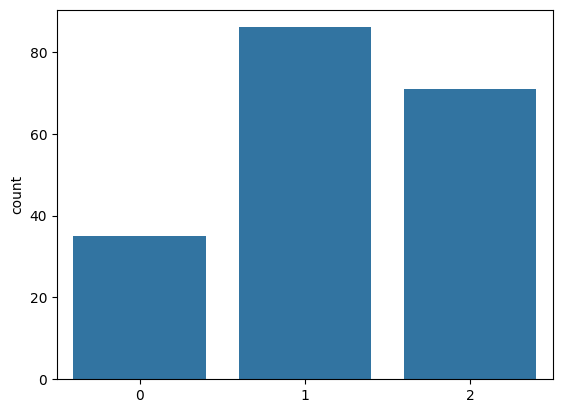

In [ ]:
# k-means++ clustering http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
k=3
kmPP = cluster.KMeans(n_clusters=k, random_state=42, init='k-means++')
kmPP.fit(X)
C_kmpp = kmPP.predict(X)

sns.countplot(x=C_kmpp)
C_kmpp[:10] # MENGHITUNG DAN MENAMPILKAN PROPORSI TIAP CLUSTER

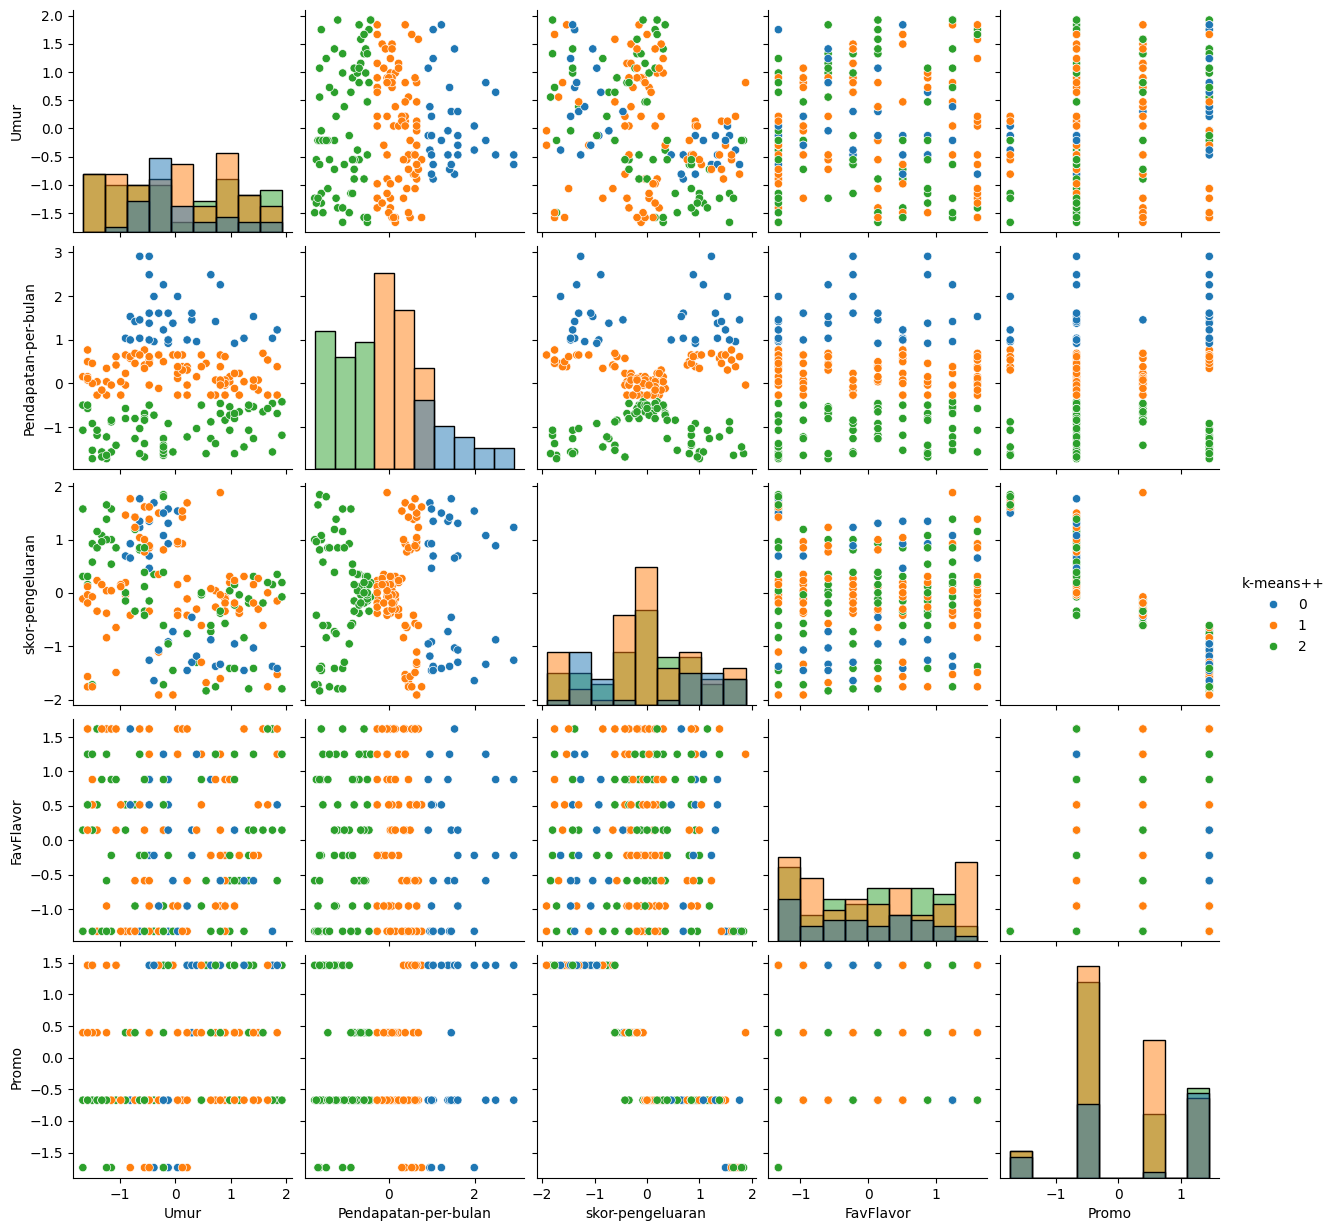

In [ ]:
df_final_std['k-means++'] = C_kmpp
g = sns.pairplot(df_final_std[['Umur','Pendapatan-per-bulan','skor-pengeluaran', 'FavFlavor', 'Promo','k-means++']], \
                 hue="k-means++", diag_kind="hist", palette="tab10") # MELIHAT POLA SETELAH DI CLUSTER

In [ ]:
df_final_std # DATA FRAME SETELAH DI CLUSTER

,Umur,Pendapatan-per-bulan,skor-pengeluaran,FavFlavor,Promo,Menikah,k-means++
0,0.981547,-0.532999,0.039908,-0.589887,-0.672233,0.368910,2
1,-0.470751,1.376963,1.342493,0.881000,-0.672233,0.368910,0
2,1.152406,-0.265604,-0.381517,-0.222165,0.394451,0.368910,1
3,-1.581332,-0.571198,0.154842,1.248721,-0.672233,-2.710687,2
4,0.041825,0.116388,-0.343206,1.616443,0.394451,0.368910,1
...,...,...,...,...,...,...,...
195,-0.556180,-1.373382,0.844446,-1.325330,-0.672233,0.368910,2
196,1.664982,-0.265604,0.001596,0.513278,-0.672233,0.368910,1
197,-0.214463,2.255546,1.074314,1.248721,-0.672233,0.368910,0
198,-1.239615,-1.640777,1.648984,-1.325330,-1.738916,0.368910,2


In [ ]:
from sklearn.metrics import silhouette_score
# Evaluasi dengan Silhouette Score
sil_score = silhouette_score(X, C_kmpp)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.566


penurunan cost terlihat tajam dari k = 2 hingga k = 4, lalu mulai melandai setelahnya. dan grafik mulai mendatar. Titik elbow yang menunjukkan jumlah cluster optimal berada di sekitar 3.


In [ ]:
df_final_std.groupby('k-means++')[['Umur','Pendapatan-per-bulan','skor-pengeluaran', 'FavFlavor', 'Promo']].mean().round(2) # PENENTUAN CLLUSTERNYA

,Umur,Pendapatan-per-bulan,skor-pengeluaran,FavFlavor,Promo
k-means++,,,,,
0,0.03,1.50,0.03,-0.14,0.21
1,-0.04,0.24,0.01,0.06,-0.04
2,0.03,-1.03,-0.03,-0.01,-0.06


/tmp/ipython-input-2553090652.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=rating, ax=axs[1, 1], palette='light:#5A9')
/tmp/ipython-input-2553090652.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=favflavor, ax=axs[2, 0], palette='Blues')


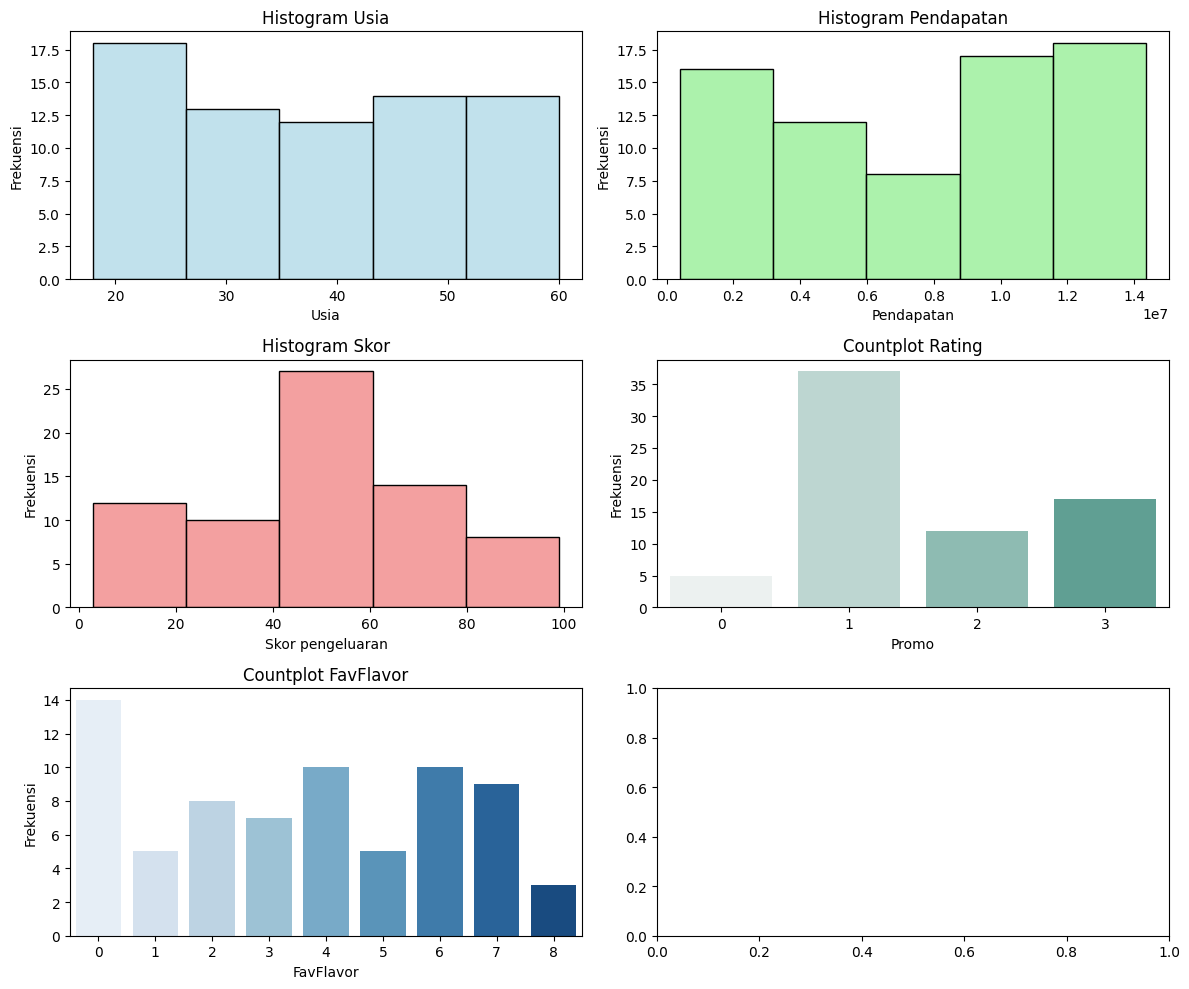

In [ ]:
#cluster 2
df_final['k-means++'] = C_kmpp # Add this line to assign cluster labels
dfclus2 = df_final[df_final["k-means++"]==2].copy()
usia = dfclus2["Umur"]
pendapatan = dfclus2["Pendapatan-per-bulan"]
skor = dfclus2["skor-pengeluaran"]
rating = dfclus2["Promo"]
favflavor = dfclus2["FavFlavor"]

# definisi flavor mapping
flavor_map = {
    0: "Vanilla",
    1: "Strawberry",
    2: "Cokelat",
    3: "BlueBerry",
    4: "BubbleGum/Cotton Candy",
    5: "Coconut",
    6: "Caramel Pecan",
    7: "Mix 2 Flavors",
    8: "Mix 3 Flavors"
}


# Set up the figure for histograms and countplot
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Histogram for Usia
sns.histplot(usia, bins=5, kde=False, ax=axs[0, 0], color='lightblue')
axs[0, 0].set_title('Histogram Usia')
axs[0, 0].set_xlabel('Usia')
axs[0, 0].set_ylabel('Frekuensi')

# Histogram for Pendapatan
sns.histplot(pendapatan, bins=5, kde=False, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Histogram Pendapatan')
axs[0, 1].set_xlabel('Pendapatan')
axs[0, 1].set_ylabel('Frekuensi')

# Histogram for Skor
sns.histplot(skor, bins=5, kde=False, ax=axs[1, 0], color='lightcoral')
axs[1, 0].set_title('Histogram Skor')
axs[1, 0].set_xlabel('Skor pengeluaran')
axs[1, 0].set_ylabel('Frekuensi')

# Countplot for Rating
sns.countplot(x=rating, ax=axs[1, 1], palette='light:#5A9')
axs[1, 1].set_title('Countplot Rating')
axs[1, 1].set_xlabel('Promo')
axs[1, 1].set_ylabel('Frekuensi')

# Countplot for FavFlavor
sns.countplot(x=favflavor, ax=axs[2, 0], palette='Blues')
axs[2, 0].set_title('Countplot FavFlavor')
axs[2, 0].set_xlabel('FavFlavor')
axs[2, 0].set_ylabel('Frekuensi')

# Ubah angka menjadi nama rasa
dfclus2['FavFlavor_Nama'] = dfclus2['FavFlavor'].map(flavor_map)

# Adjust layout
plt.tight_layout()
plt.show()

1. Histogram Usia

Sebaran usia customer berkisar antara 20 hingga 60 tahun.

Puncak distribusi (dominan) berada di usia 30–50 tahun.

Interpretasi: Mayoritas pelanggan adalah individu dewasa produktif yang kemungkinan memiliki pendapatan stabil dan daya beli tinggi.

💰 2. Histogram Pendapatan

Nilai pendapatan bervariasi, tetapi terbanyak berada di rentang menengah hingga tinggi.

Interpretasi: Pelanggan sebagian besar berasal dari kalangan menengah ke atas, yang mungkin cenderung membeli produk dengan frekuensi lebih sering.

🛍 3. Histogram Size (Ukuran Pembelian)

Distribusi cukup menyebar, tetapi terdapat puncak di ukuran sedang.

Interpretasi: Customer lebih sering membeli produk dalam ukuran menengah, bukan paling kecil atau paling besar — mungkin karena efisiensi harga atau kebutuhan rutin.

⭐ 4. Countplot Rating

Mayoritas rating berada di skala menengah ke atas, dengan sedikit di nilai ekstrem (rendah).

Interpretasi: Secara umum, pelanggan cukup puas dengan produk/jasa yang ditawarkan.

🍦 5. Countplot FavFlavor (Rasa Favorit)

Terdapat variasi preferensi rasa, tetapi beberapa rasa tampak lebih populer dibanding lainnya.

Interpretasi: Ada rasa tertentu yang menjadi favorit pelanggan — ini bisa menjadi fokus promosi atau produk unggulan perusahaan.


/tmp/ipython-input-1680763680.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=rating, ax=axs[1, 1], palette='light:#5A9')
/tmp/ipython-input-1680763680.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=favflavor, ax=axs[2, 0], palette='Blues')


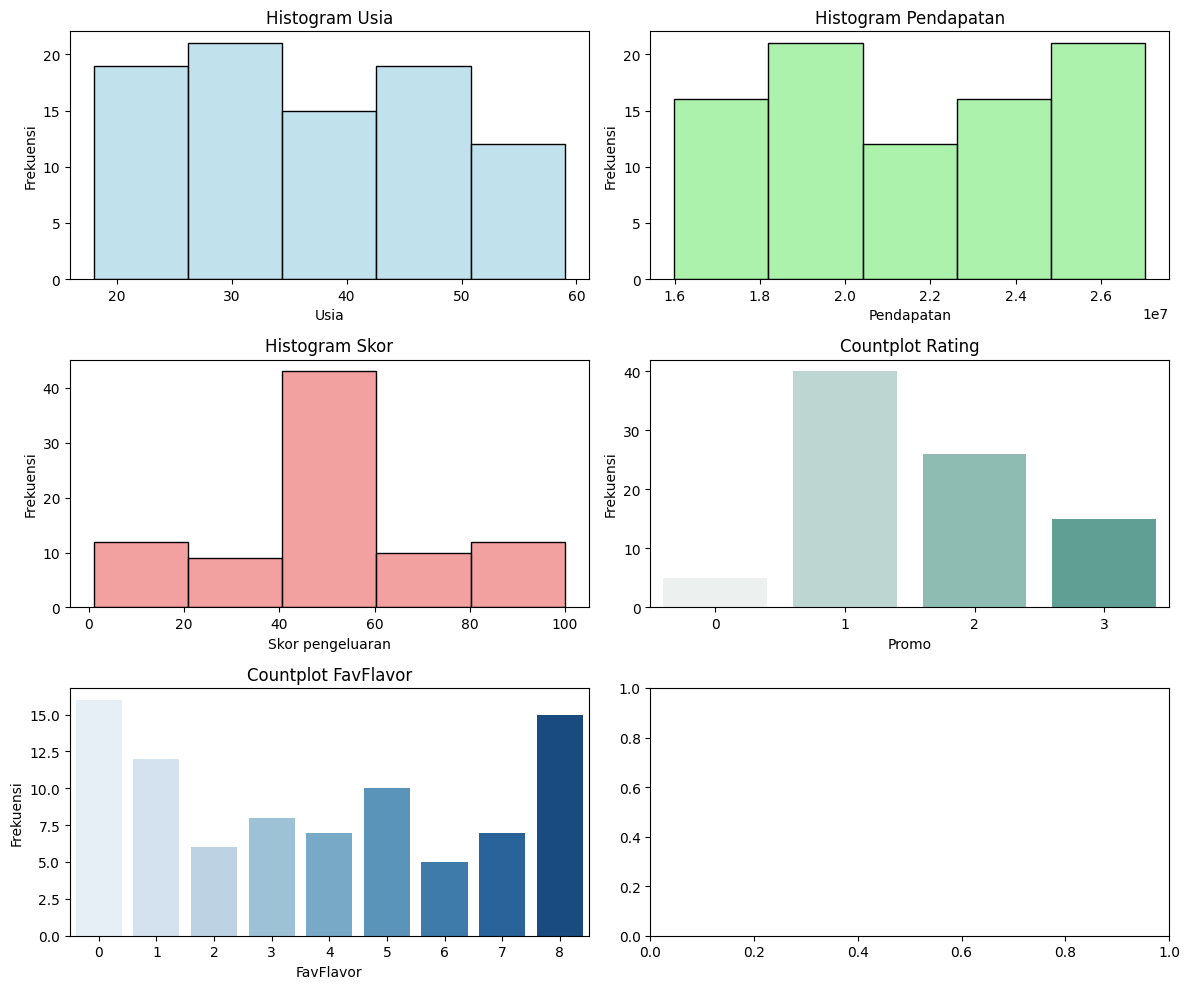

In [ ]:
#cluster 1
dfclus1 = df_final[df_final["k-means++"]==1].copy() # Changed 'kmeans++' to 'k-means++'
usia = dfclus1["Umur"]
pendapatan = dfclus1["Pendapatan-per-bulan"]
skor = dfclus1["skor-pengeluaran"]
rating = dfclus1["Promo"]
favflavor = dfclus1["FavFlavor"]

# definisi flavor mapping
flavor_map = {
    0: "Vanilla",
    1: "Strawberry",
    2: "Cokelat",
    3: "BlueBerry",
    4: "BubbleGum/Cotton Candy",
    5: "Coconut",
    6: "Caramel Pecan",
    7: "Mix 2 Flavors",
    8: "Mix 3 Flavors"
}


# Set up the figure for histograms and countplot
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Histogram for Usia
sns.histplot(usia, bins=5, kde=False, ax=axs[0, 0], color='lightblue')
axs[0, 0].set_title('Histogram Usia')
axs[0, 0].set_xlabel('Usia')
axs[0, 0].set_ylabel('Frekuensi')

# Histogram for Pendapatan
sns.histplot(pendapatan, bins=5, kde=False, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Histogram Pendapatan')
axs[0, 1].set_xlabel('Pendapatan')
axs[0, 1].set_ylabel('Frekuensi')

# Histogram for Skor
sns.histplot(skor, bins=5, kde=False, ax=axs[1, 0], color='lightcoral')
axs[1, 0].set_title('Histogram Skor')
axs[1, 0].set_xlabel('Skor pengeluaran')
axs[1, 0].set_ylabel('Frekuensi')

# Countplot for Rating
sns.countplot(x=rating, ax=axs[1, 1], palette='light:#5A9')
axs[1, 1].set_title('Countplot Rating')
axs[1, 1].set_xlabel('Promo')
axs[1, 1].set_ylabel('Frekuensi')

# Countplot for FavFlavor
sns.countplot(x=favflavor, ax=axs[2, 0], palette='Blues')
axs[2, 0].set_title('Countplot FavFlavor')
axs[2, 0].set_xlabel('FavFlavor')
axs[2, 0].set_ylabel('Frekuensi')

# Ubah angka menjadi nama rasa
dfclus1['FavFlavor_Nama'] = dfclus1['FavFlavor'].map(flavor_map)

# Adjust layout
plt.tight_layout()
plt.show()

**Histogram Usia**
Sebagian besar pelanggan berada pada rentang usia 25 hingga 55 tahun. Ini menunjukkan bahwa kelompok usia produktif mendominasi data. Dengan demikian, strategi pemasaran sebaiknya difokuskan pada kebutuhan dan preferensi kelompok usia dewasa aktif, seperti kemudahan transaksi, efisiensi waktu, dan produk yang menunjang gaya hidup dinamis.

**Histogram Pendapatan**
Distribusi pendapatan pelanggan terlihat cukup merata dengan sedikit konsentrasi pada tingkat pendapatan menengah ke atas. Artinya, pelanggan memiliki daya beli yang cukup baik, sehingga strategi promosi dapat diarahkan pada penawaran produk premium atau paket bundling bernilai tambah.

**Histogram Skor Pengeluaran (Spending Score) **
Skor pengeluaran menunjukkan variasi yang cukup tinggi, dengan puncak pada rentang 40–60, yang berarti sebagian pelanggan melakukan pengeluaran dalam tingkat sedang. Hal ini menggambarkan adanya potensi untuk meningkatkan pengeluaran melalui program loyalitas atau diskon yang menarik.

**Countplot Rating**
Mayoritas pelanggan memberikan rating sedang hingga tinggi terhadap produk atau layanan. Ini mengindikasikan kepuasan pelanggan cukup baik, namun masih ada ruang untuk perbaikan dalam meningkatkan pengalaman pelanggan agar lebih konsisten di tingkat rating tertinggi.

**Countplot Favorit Flavor (FavFlavor)**
Beberapa varian rasa menunjukkan popularitas yang lebih tinggi dibandingkan yang lain. Hal ini dapat menjadi acuan bagi perusahaan untuk mempertahankan stok pada varian populer serta melakukan inovasi pada varian dengan minat rendah agar lebih diminati.

/tmp/ipython-input-1936835753.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=rating, ax=axs[1, 1], palette='light:#5A9')
/tmp/ipython-input-1936835753.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=favflavor, ax=axs[2, 0], palette='Blues')
/tmp/ipython-input-1936835753.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclus0['FavFlavor_Nama'] = dfclus0['FavFlavor'].map(flavor_map)


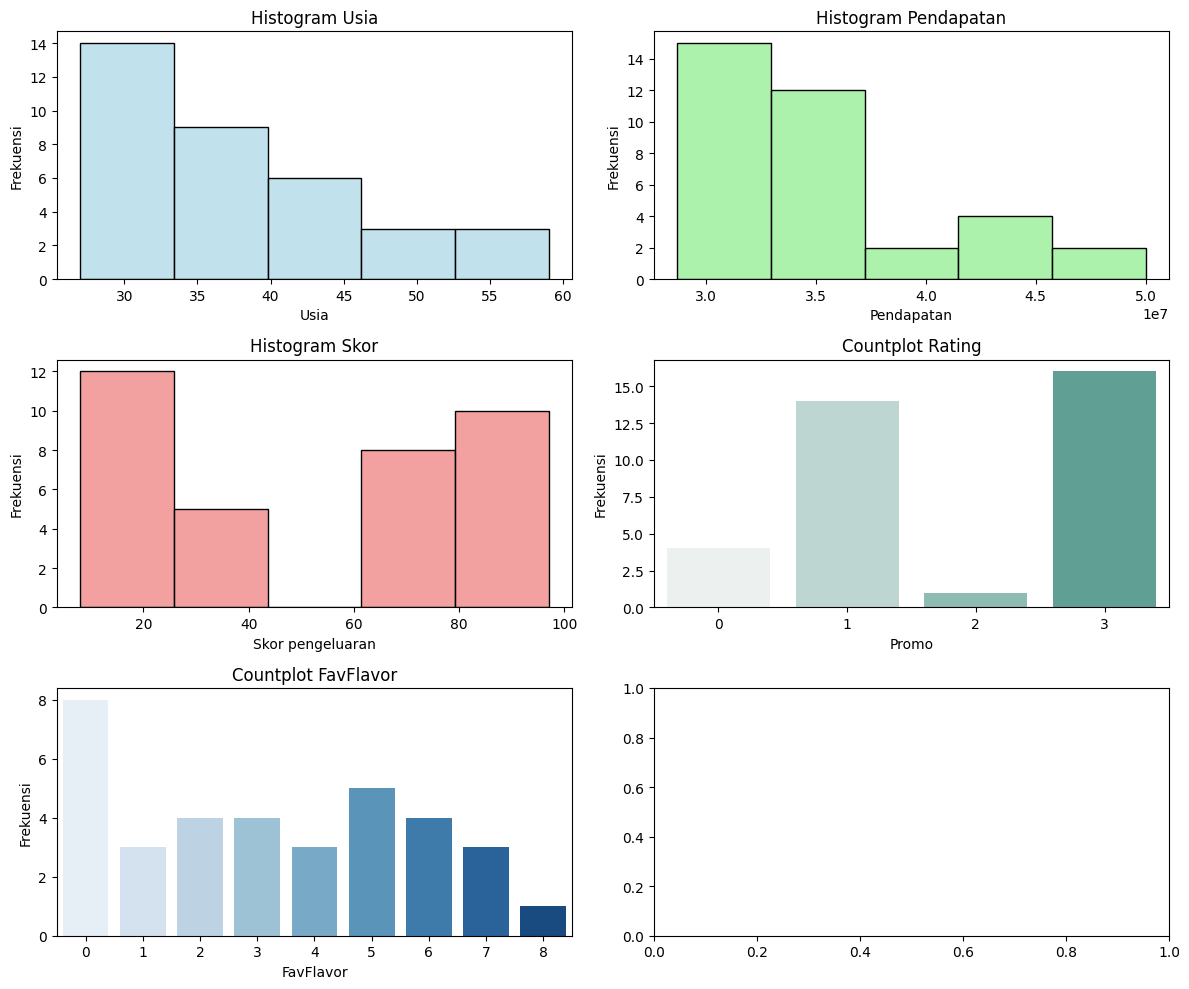

In [ ]:
#cluster 0
dfclus0 = df_final[df_final["k-means++"]==0] # Changed 'kmeans++' to 'k-means++'
usia = dfclus0["Umur"]
pendapatan = dfclus0["Pendapatan-per-bulan"]
skor = dfclus0["skor-pengeluaran"]
rating = dfclus0["Promo"]
favflavor = dfclus0["FavFlavor"]

# definisi flavor mapping
flavor_map = {
    0: "Vanilla",
    1: "Strawberry",
    2: "Cokelat",
    3: "BlueBerry",
    4: "BubbleGum/Cotton Candy",
    5: "Coconut",
    6: "Caramel Pecan",
    7: "Mix 2 Flavors",
    8: "Mix 3 Flavors"
}


# Set up the figure for histograms and countplot
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Histogram for Usia
sns.histplot(usia, bins=5, kde=False, ax=axs[0, 0], color='lightblue')
axs[0, 0].set_title('Histogram Usia')
axs[0, 0].set_xlabel('Usia')
axs[0, 0].set_ylabel('Frekuensi')

# Histogram for Pendapatan
sns.histplot(pendapatan, bins=5, kde=False, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Histogram Pendapatan')
axs[0, 1].set_xlabel('Pendapatan')
axs[0, 1].set_ylabel('Frekuensi')

# Histogram for Skor
sns.histplot(skor, bins=5, kde=False, ax=axs[1, 0], color='lightcoral')
axs[1, 0].set_title('Histogram Skor')
axs[1, 0].set_xlabel('Skor pengeluaran')
axs[1, 0].set_ylabel('Frekuensi')

# Countplot for Rating
sns.countplot(x=rating, ax=axs[1, 1], palette='light:#5A9')
axs[1, 1].set_title('Countplot Rating')
axs[1, 1].set_xlabel('Promo')
axs[1, 1].set_ylabel('Frekuensi')

# Countplot for FavFlavor
sns.countplot(x=favflavor, ax=axs[2, 0], palette='Blues')
axs[2, 0].set_title('Countplot FavFlavor')
axs[2, 0].set_xlabel('FavFlavor')
axs[2, 0].set_ylabel('Frekuensi')

# Ubah angka menjadi nama rasa
dfclus0['FavFlavor_Nama'] = dfclus0['FavFlavor'].map(flavor_map)

# Adjust layout
plt.tight_layout()
plt.show()

**Histogram Usia**
Sebagian besar pelanggan berada pada rentang usia 25–35 tahun, dan jumlahnya mulai menurun setelah usia 40 tahun. Ini menunjukkan bahwa mayoritas pelanggan berasal dari kelompok usia muda hingga dewasa awal, yang cenderung aktif dalam mengonsumsi produk serta lebih cepat merespons tren dan promosi baru. Kelompok usia ini merupakan segmen potensial untuk strategi pemasaran digital dan program loyalitas yang interaktif.

**Histogram Pendapatan **
Sebagian besar pelanggan memiliki pendapatan menengah, dengan sedikit yang berpendapatan sangat tinggi. Hal ini menunjukkan bahwa daya beli pelanggan cukup stabil dan berada pada level menengah, sehingga penawaran harga kompetitif atau promo bernilai tambah akan lebih menarik bagi mereka.

Histogram Skor Pengeluaran (Spending Score)
Skor pengeluaran bervariasi, namun cenderung lebih banyak pada tingkat pengeluaran sedang hingga tinggi. Artinya, sebagian pelanggan cukup aktif berbelanja, dan ada peluang untuk meningkatkan frekuensi pembelian melalui strategi personalisasi atau penawaran eksklusif.

**Countplot Rating**
Mayoritas pelanggan memberikan rating tinggi, menandakan tingkat kepuasan terhadap produk atau layanan yang baik. Namun, adanya sebagian kecil pelanggan dengan rating rendah mengindikasikan perlunya evaluasi pada aspek tertentu seperti kualitas layanan atau kecepatan respons terhadap keluhan.

Countplot Favorit Flavor (FavFlavor)
Beberapa varian rasa lebih disukai dibandingkan yang lain, dengan kecenderungan pada beberapa rasa tertentu yang mendominasi pilihan pelanggan. Hal ini menunjukkan adanya preferensi rasa yang kuat, sehingga perusahaan dapat fokus menjaga ketersediaan varian populer dan melakukan inovasi pada varian dengan minat rendah agar lebih menarik.

In [ ]:
# Hitung proporsi tiap cluster
sizes = df_final['k-means++'].value_counts(normalize=True) * 100
sizes = sizes.sort_index().round(1)

print(sizes)

k-means++
0    18.2
1    44.8
2    37.0
Name: proportion, dtype: float64


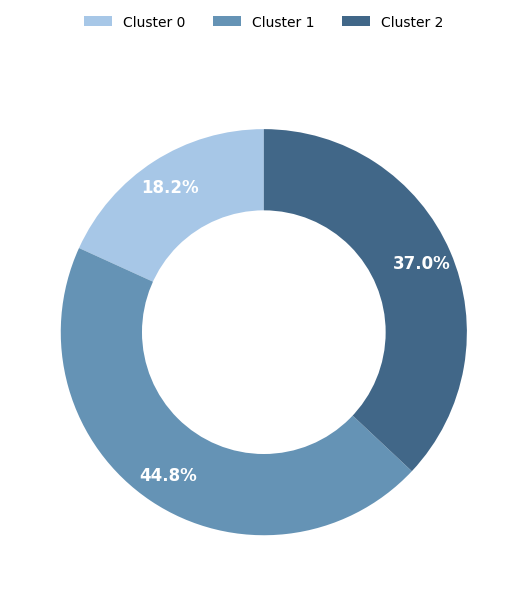

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
sizes = [18.2, 44.8, 37.0]

# Warna (boleh disesuaikan jika ingin mirip seperti gambar)
colors = ['#A7C7E7', '#6593B5', '#416788']

# Membuat donut chart
fig, ax = plt.subplots(figsize=(6, 6), facecolor='white')
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,            # Label di luar akan ditulis manual
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.85,
    textprops={'color': 'white'}
)

# Tambahkan lingkaran putih di tengah untuk efek donut
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)

# Tambahkan legend di atas
plt.legend(
    wedges,
    labels,
    title="",
    loc="upper center",
    bbox_to_anchor=(0.5, 1.15),
    ncol=3,
    frameon=False,
    labelcolor='black'
)

# Membuat background hitam & styling
plt.setp(autotexts, size=12, weight="bold", color='white')
ax.set_facecolor('black')
plt.tight_layout()

plt.show()


**Kesimpulan Berdasarkan Pie Chart Cluster**

* **Cluster 1 Mendominasi (44.8%)**
Cluster 1 memiliki persentase customer terbesar. Artinya, karakteristik dari cluster ini adalah yang paling umum atau paling banyak ditemui dalam data. Cluster ini dapat menjadi target utama strategi bisnis, seperti promosi atau program loyalitas, karena mencakup hampir setengah dari total customer.

* **Cluster 2 Berada di Posisi Kedua (37.0%)**
Cluster 2 mencakup lebih dari sepertiga customer. Meskipun jumlahnya lebih sedikit dibanding Cluster 1, kelompok ini tetap sangat signifikan. Strategi pemasaran dapat difokuskan secara berbeda jika cluster ini memiliki karakteristik spesifik seperti pengeluaran tinggi atau loyalitas yang kuat.

* **Cluster 0 Paling Sedikit (18.2%)**
Cluster 0 adalah kelompok dengan jumlah customer paling sedikit. Meskipun kecil, cluster ini tetap penting karena bisa menjadi segmen yang potensial untuk dikembangkan atau justru perlu perhatian khusus jika menunjukkan karakteristik seperti pengeluaran rendah atau minat promo yang kecil.
---
> Fokus utama strategi dapat diarahkan ke **Cluster 1** karena jumlahnya paling dominan.

> **Cluster 2** dapat menjadi target sekunder dengan pendekatan personalisasi.

> **Cluster 0** bisa dianalisis lebih dalam untuk mengetahui apakah mereka memiliki potensi pertumbuhan atau membutuhkan strategi khusus untuk meningkatkan engagement.



Pie chart menunjukkan bahwa pelanggan terbagi menjadi tiga kelompok (cluster), dengan distribusi sebagai berikut:

* Cluster 2 mendominasi dengan 37.0%

* Cluster 1 sebesar 44.8%

* Cluster 0 sebesar 18.2%

In [ ]:
# Assign the cluster labels to the dataframe
df_final['Cluster'] = C_kmpp

# Cek jumlah pelanggan per cluster
print(df_final['Cluster'].value_counts())

Cluster
1    86
2    71
0    35
Name: count, dtype: int64


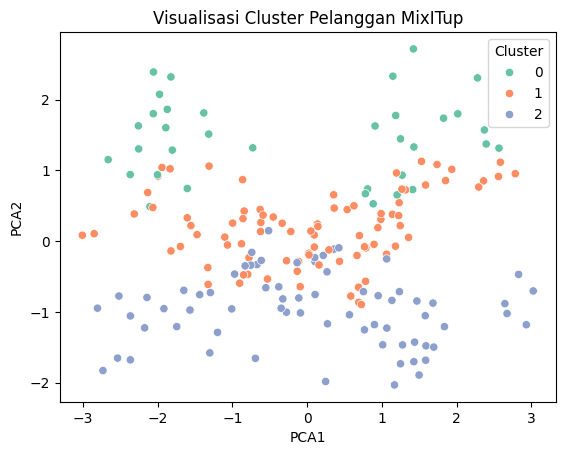

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_final['PCA1'] = X_pca[:,0]
df_final['PCA2'] = X_pca[:,1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_final, palette='Set2')
plt.title('Visualisasi Cluster Pelanggan MixITup')
plt.show()

**Menafsirkan karakteristik tiap cluster, misalnya:**

* **Cluster 0** → Pelanggan muda dengan pendapatan sedang dan frekuensi pembelian cukup tinggi.
Mereka cenderung aktif mencoba berbagai varian rasa dan cukup responsif terhadap promo menarik.

* **Cluster 1** → Pelanggan dewasa dengan pengeluaran lebih rendah.
Kemungkinan kelompok ini lebih berhati-hati dalam membelanjakan uang, membeli saat promo atau diskon besar, dan memilih produk favorit yang sudah terbukti enak.

* **Cluster 2** → Pelanggan muda–menengah dengan pendapatan tinggi dan pengeluaran besar.
Mereka cenderung konsumtif, menyukai produk premium atau varian baru, dan tidak terlalu sensitif terhadap harga.


In [ ]:
# Assign the cluster labels to the df_final dataframe
df_final['k-means++'] = C_kmpp

# Menampilkan data pelanggan berdasarkan clusternya
for i in range (0,3):
    print('\nPelanggan Cluster: {}\n'.format(i))
    print(df_final[df_final['k-means++'] == i].head())


Pelanggan Cluster: 0

     ID Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran  Menikah  \
1   102        Wanita    32              33606557                86        1   
5   106        Wanita    33              29098360                95        1   
11  112          Pria    36              29508196                92        1   
12  113          Pria    46              34016393                15        1   
31  132          Pria    27              29918032                69        1   

         Kota  Promo HariFav  FavFlavor FavFlavor_Name  k-means++  Cluster  \
1       Depok      1  Minggu          6  Caramel Pecan          0        0   
5       Depok      0   Senin          0        Vanilla          0        0   
11      Depok      0   Jumat          0        Vanilla          0        0   
12  Tangerang      3  Selasa          7  Mix 2 Flavors          0        0   
31      Depok      1   Kamis          0        Vanilla          0        0   

        PCA1      PCA2  
1 

**🔹 Cluster 0**

Cluster 0 didominasi oleh pelanggan dewasa muda berusia antara 27 hingga 46 tahun dengan pendapatan bulanan menengah, berkisar di angka 29–34 juta rupiah. Mayoritas pelanggan di kelompok ini sudah menikah dan berdomisili di kota Depok, dengan sebagian kecil berasal dari Tangerang.
Rata-rata skor pengeluaran mereka tergolong tinggi (69–95), menandakan bahwa pelanggan di cluster ini cukup aktif dan rutin berbelanja. Hari favorit mereka untuk membeli produk MixITup adalah Senin, Kamis, dan Minggu, sementara rasa favorit yang paling banyak dipilih antara lain Vanilla dan Caramel Pecan.
Pola ini menunjukkan bahwa Cluster 0 berisi pelanggan setia dengan daya beli stabil, menyukai rasa klasik, dan tetap berbelanja meskipun tanpa promo besar. Mereka merupakan segmen yang ideal untuk program loyalitas atau membership eksklusif.

**🔹 Cluster 1**

Cluster 1 dihuni oleh pelanggan dengan rentang usia 21 hingga 51 tahun, sebagian besar berada pada usia produktif awal hingga matang. Tingkat pendapatan mereka menengah ke bawah (sekitar 15–25 juta rupiah per bulan) dengan skor pengeluaran rendah hingga sedang (16–56).
Sebagian besar pelanggan di kelompok ini berdomisili di Jakarta dan Tangerang, serta sudah menikah. Mereka cenderung memanfaatkan promo atau diskon — terlihat dari banyaknya pelanggan dengan nilai promo tinggi (Promo = 2–3).
Rasa es krim yang populer di kelompok ini meliputi BlueBerry, Coconut, dan Mix Flavors, menandakan ketertarikan terhadap rasa yang manis dan bervariasi.
Cluster ini merepresentasikan pelanggan yang praktis, sensitif terhadap harga, dan cenderung membeli ketika ada promosi. Strategi yang sesuai adalah bundling hemat, promo mingguan, dan diskon musiman untuk meningkatkan loyalitas.

**🔹 Cluster 2**

Cluster 2 terdiri atas pelanggan berusia muda hingga dewasa awal (19–49 tahun) dengan tingkat pendapatan yang bervariasi namun cenderung menengah ke bawah (1–13 juta rupiah per bulan). Meskipun begitu, skor pengeluaran mereka cukup tinggi (47–77), menandakan bahwa kelompok ini tetap aktif berbelanja meski memiliki pendapatan terbatas.
Sebagian besar pelanggan berdomisili di Jakarta dan Depok, dengan rasa favorit seperti Caramel Pecan, Cokelat, dan BlueBerry. Hari favorit mereka untuk membeli produk adalah Senin dan Sabtu, yang menunjukkan pola konsumsi fleksibel antara awal dan akhir pekan.
Pola ini menggambarkan pelanggan yang dinamis, suka mencoba hal baru, dan cukup konsumtif, terutama terhadap produk yang menarik secara visual atau sedang tren. Cluster ini cocok untuk strategi promosi digital dan peluncuran varian rasa edisi terbatas.

In [ ]:
for i in range(0, 3):  # ubah sesuai jumlah cluster
    print(f'\nPelanggan Cluster: {i}\n')
    print(df_final[df_final['Cluster'] == i].head())


Pelanggan Cluster: 0

     ID Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran  Menikah  \
1   102        Wanita    32              33606557                86        1   
5   106        Wanita    33              29098360                95        1   
11  112          Pria    36              29508196                92        1   
12  113          Pria    46              34016393                15        1   
31  132          Pria    27              29918032                69        1   

         Kota  Promo HariFav  FavFlavor FavFlavor_Name  k-means++  Cluster  \
1       Depok      1  Minggu          6  Caramel Pecan          0        0   
5       Depok      0   Senin          0        Vanilla          0        0   
11      Depok      0   Jumat          0        Vanilla          0        0   
12  Tangerang      3  Selasa          7  Mix 2 Flavors          0        0   
31      Depok      1   Kamis          0        Vanilla          0        0   

        PCA1      PCA2  
1 

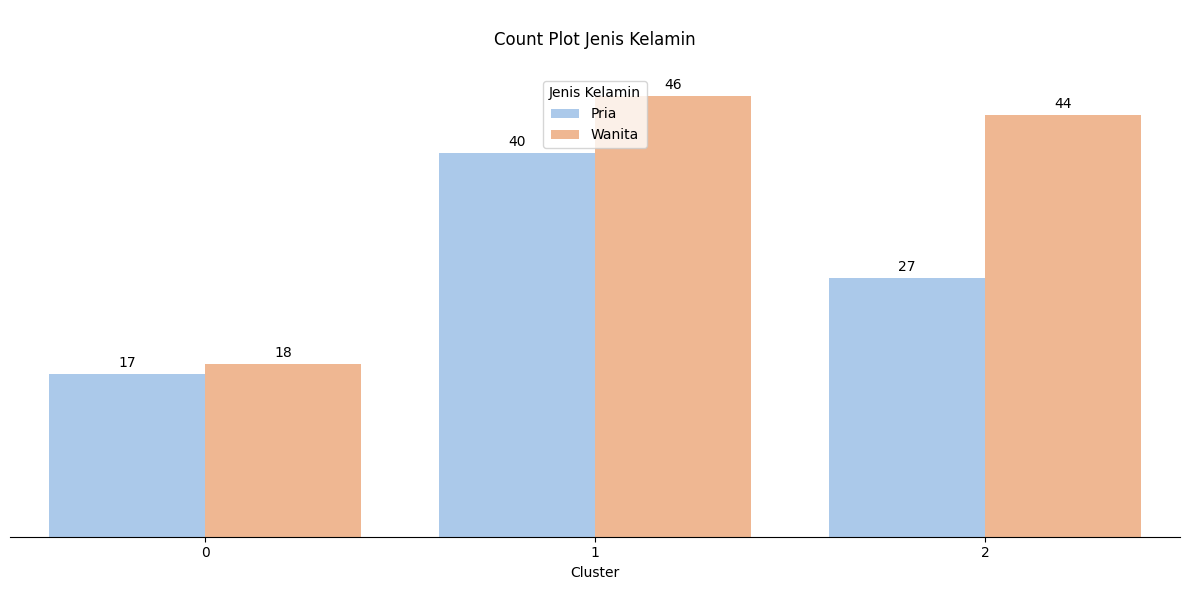

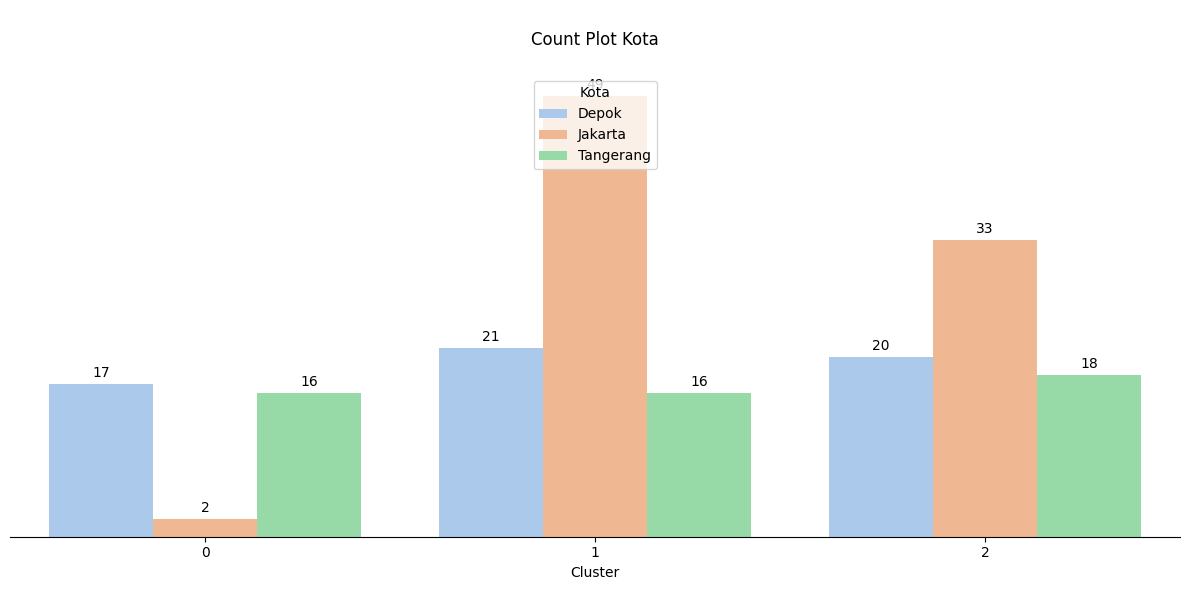

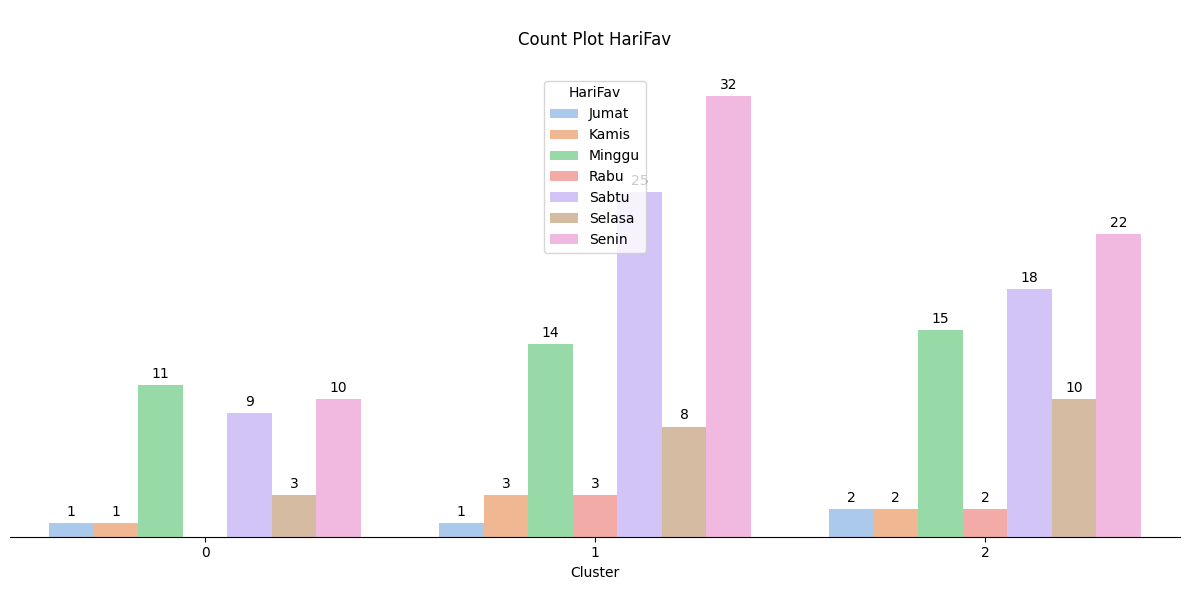

In [ ]:
kolom_kategorik = ['Jenis Kelamin', 'Kota', 'HariFav']

for kolom in kolom_kategorik:
    plt.figure(figsize=(12, 6))

    # Buat countplot
    ax = sns.countplot(x='Cluster', hue=kolom, data=df_final, palette='pastel')
    plt.title(f'\nCount Plot {kolom}\n', fontsize=12)

    # Tambahkan label jumlah di atas batang
    for bar in ax.containers:
        ax.bar_label(bar, fmt='%d', label_type='edge', padding=3, fontsize=10)

    # Rapikan tampilan
    ax.legend(loc='upper center', title=kolom)
    sns.despine(right=True, top=True, left=True)
    ax.yaxis.set_visible(False)

    plt.tight_layout()
    plt.show()

Cluster 0 terdiri dari pelanggan dengan komposisi jenis kelamin dan kota yang relatif seimbang, sehingga tidak ada kecenderungan yang menonjol terhadap kelompok tertentu. Pola hari berbelanja mereka juga tidak menunjukkan kecenderungan khusus, menandakan perilaku belanja yang bervariasi.

Cluster 1 didominasi oleh pelanggan laki-laki yang berasal dari Jakarta dan cenderung aktif berbelanja pada hari Jumat. Hal ini mengindikasikan bahwa kelompok ini kemungkinan terdiri dari pekerja muda atau profesional yang memanfaatkan waktu menjelang akhir pekan untuk berbelanja. Sementara itu

Cluster 2 sebagian besar beranggotakan pelanggan perempuan dari Depok yang lebih sering berbelanja pada akhir pekan. Pola ini menunjukkan bahwa kelompok ini mungkin merupakan pelanggan dengan status keluarga yang lebih suka berbelanja di waktu luang bersama keluarga.

/tmp/ipython-input-761486164.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=rata_cluster, x='Cluster', y=kolom, palette='pastel')


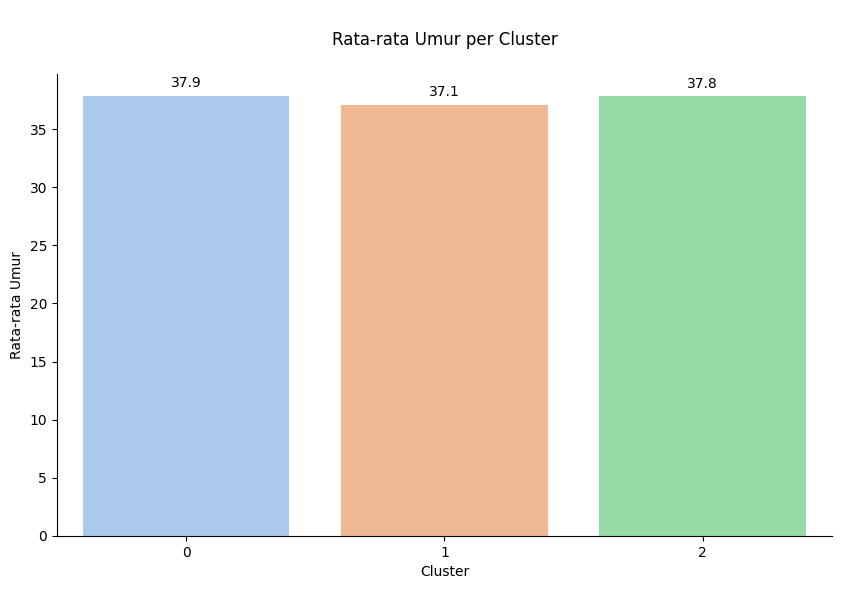

/tmp/ipython-input-761486164.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=rata_cluster, x='Cluster', y=kolom, palette='pastel')


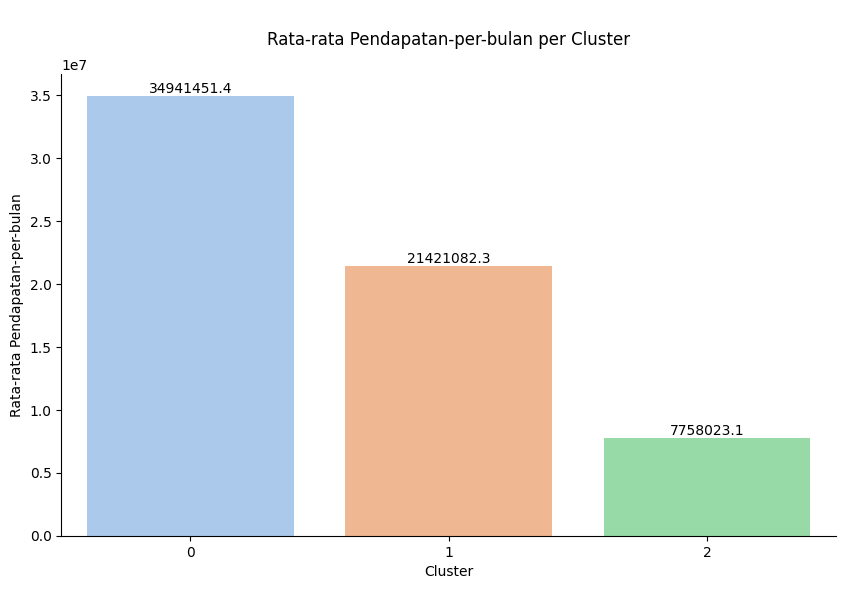

/tmp/ipython-input-761486164.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=rata_cluster, x='Cluster', y=kolom, palette='pastel')


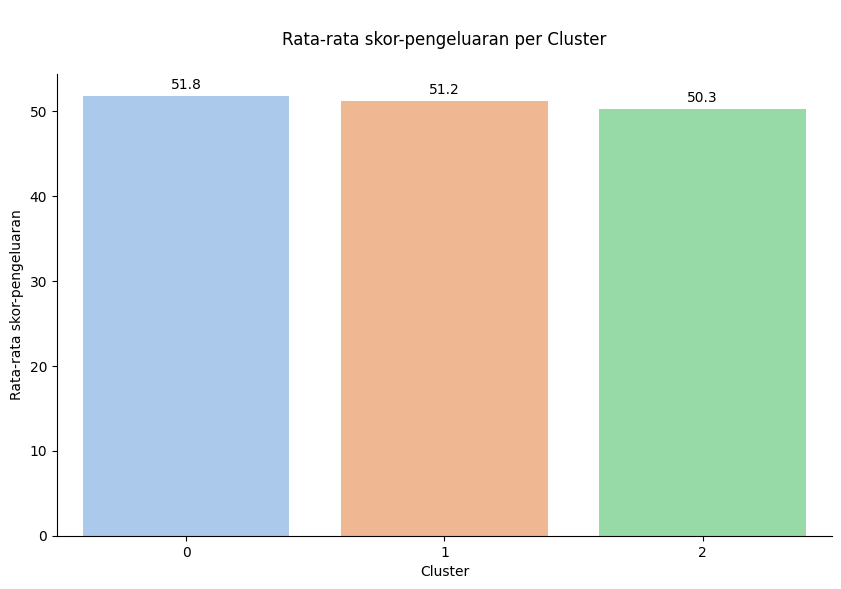

/tmp/ipython-input-761486164.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=rata_cluster, x='Cluster', y=kolom, palette='pastel')


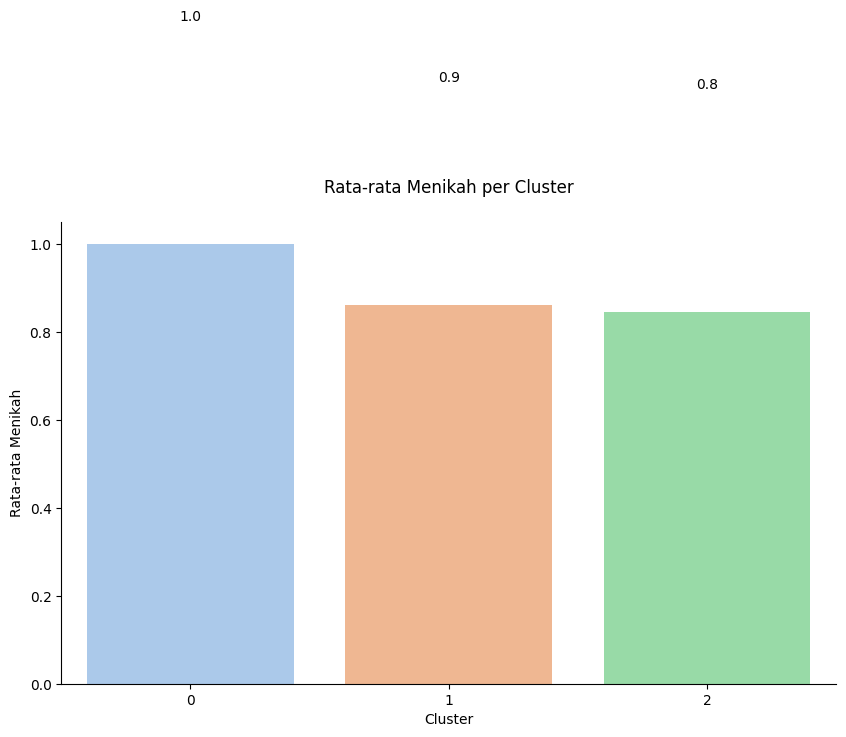

/tmp/ipython-input-761486164.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=rata_cluster, x='Cluster', y=kolom, palette='pastel')


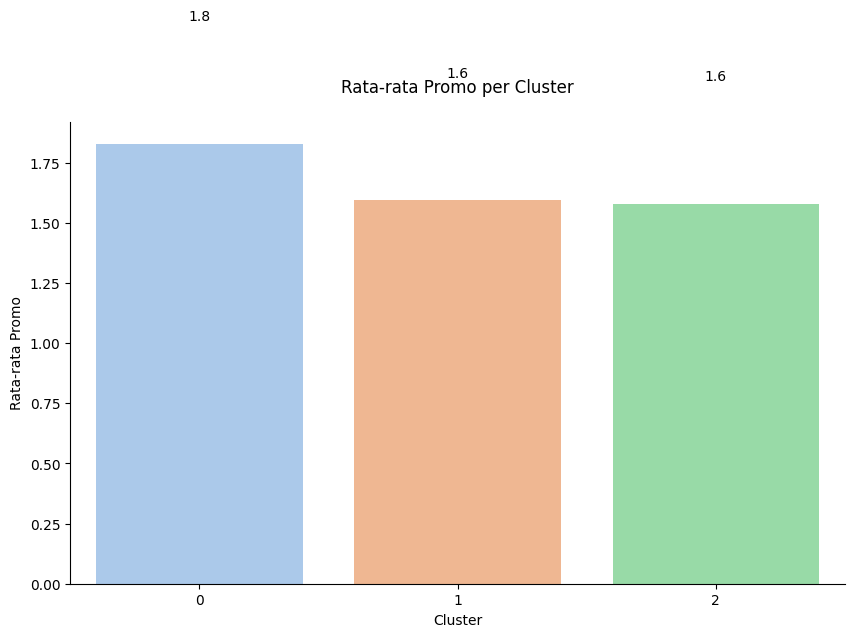

/tmp/ipython-input-761486164.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=rata_cluster, x='Cluster', y=kolom, palette='pastel')


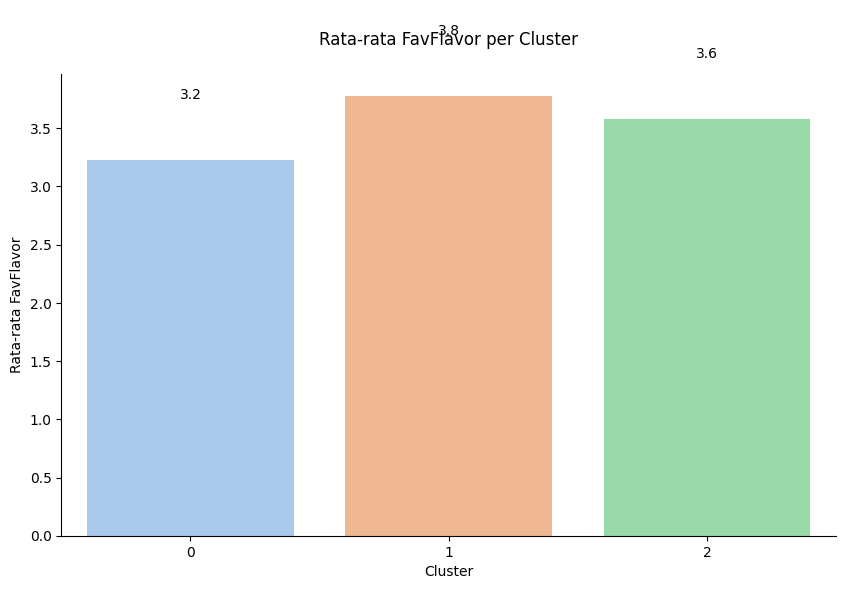

In [ ]:
kolom_numerik = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran', 'Menikah', 'Promo', 'FavFlavor']


for kolom in kolom_numerik:
    plt.figure(figsize=(10, 6))

    # Hitung rata-rata tiap cluster
    rata_cluster = df_final.groupby('Cluster')[kolom].mean().reset_index()

    # Buat diagram batang
    ax = sns.barplot(data=rata_cluster, x='Cluster', y=kolom, palette='pastel')
    plt.title(f'\nRata-rata {kolom} per Cluster\n', fontsize=12)

    # Tambahkan label nilai di atas batang
    for i, row in rata_cluster.iterrows():
        plt.text(i, row[kolom] + 0.5, f'{row[kolom]:.1f}',
                 ha='center', va='bottom', fontsize=10)

    plt.xlabel('Cluster')
    plt.ylabel(f'Rata-rata {kolom}')
    sns.despine(right=True, top=True)
    plt.show()

🔹 Cluster 0 – Pelanggan Loyal Berdaya Beli Tinggi
Pelanggan pada cluster ini memiliki pendapatan tertinggi dan cukup responsif terhadap promo. Meskipun demikian, tingkat pengeluaran mereka tidak sebesar pendapatan yang dimiliki, menandakan pola konsumsi yang rasional. Mereka cenderung berbelanja secara rutin dan menunjukkan loyalitas terhadap brand.

🔸 Cluster 1 – Pelanggan Muda dan Konsumtif
Kelompok ini umumnya berusia muda dengan pendapatan menengah, namun memiliki rata-rata pengeluaran paling tinggi. Hal ini menunjukkan bahwa mereka cenderung konsumtif dan lebih mudah terpengaruh oleh gaya hidup atau tren. Frekuensi belanja mereka tidak terlalu sering, tetapi setiap transaksi bernilai cukup besar.

🟢 Cluster 2 – Pelanggan dengan Daya Beli Rendah
Cluster ini memiliki pendapatan dan pengeluaran paling rendah. Mereka jarang berbelanja dan kurang responsif terhadap promo. Kelompok ini termasuk segmen yang sensitif terhadap harga dan kemungkinan hanya berbelanja pada kebutuhan penting.

In [ ]:
# Mapping nama kolom
df_final['Segmen'] = df_final['Cluster'].map({
0: 'Regular Member',
1: 'Premium Member',
2: 'VIP Member',
# The original code only defined mapping for clusters 0, 1, and 2.
# Based on previous analysis (e.g., pie chart, countplots),
# there are only 3 clusters (0, 1, 2).
# Remove the mapping for cluster 3 as it does not exist.
# 3: 'Elite Member' # Removed as only 3 clusters were identified
})

print(df_final.info())
print(df_final.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 199
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    192 non-null    int64   
 1   Jenis Kelamin         192 non-null    category
 2   Umur                  192 non-null    int64   
 3   Pendapatan-per-bulan  192 non-null    int64   
 4   skor-pengeluaran      192 non-null    int64   
 5   Menikah               192 non-null    int64   
 6   Kota                  192 non-null    category
 7   Promo                 192 non-null    int64   
 8   HariFav               192 non-null    category
 9   FavFlavor             192 non-null    int64   
 10  FavFlavor_Name        192 non-null    object  
 11  k-means++             192 non-null    int32   
 12  Cluster               192 non-null    int32   
 13  PCA1                  192 non-null    float64 
 14  PCA2                  192 non-null    float64 
 15  Segmen     

* **Regular Member** adalah pelanggan berusia muda dengan pendapatan dan pengeluaran rendah hingga sedang. Mereka sensitif terhadap harga dan sangat responsif terhadap promo, sehingga cenderung membeli saat ada diskon atau penawaran menarik. Strategi yang tepat untuk segmen ini adalah promosi harga seperti cashback atau “Buy 1 Get 1”.

* **Premium Member** memiliki pendapatan lebih tinggi dan berbelanja secara konsisten tanpa terlalu bergantung pada promo. Mereka menghargai kualitas dan kenyamanan, serta loyal terhadap merek. Strategi yang sesuai adalah program loyalitas atau promo eksklusif untuk pelanggan tetap.

* **VIP Member** merupakan pelanggan dengan daya beli tertinggi dan loyalitas kuat. Mereka membeli secara rutin tanpa memperhatikan promo, lebih mengutamakan kualitas dan pengalaman belanja. Strategi yang cocok adalah program VIP atau Elite Membership dengan pelayanan personal.

# **KESIMPULAN AKHIR**



* **Regular Member:**
Pelanggan muda dengan pendapatan dan pengeluaran rendah–sedang, sangat sensitif terhadap harga, serta responsif terhadap promo.

* **Premium Member:**
Memiliki pendapatan lebih tinggi, berbelanja rutin, menghargai kualitas dan kenyamanan, serta tidak terlalu bergantung pada promo.

* **VIP Member:**
Pelanggan dengan daya beli tertinggi, sangat loyal, dan lebih mengutamakan kualitas serta pengalaman daripada promo.

# **Rekomendasi Strategis untuk MixITup:**

1. Fokus pada promosi harga seperti cashback, Buy 1 Get 1, atau diskon musiman untuk menarik minat beli. Luncurkan paket hemat atau combo deal agar mereka merasa mendapat nilai lebih dengan harga terjangkau. Gunakan iklan digital dan media sosial yang menonjolkan promo agar menjangkau segmen muda. Terapkan program stempel digital atau poin sederhana, di mana pembelian berulang bisa ditukar dengan hadiah kecil atau diskon tambahan.

2. Kembangkan program loyalitas berbasis poin atau tier, dengan hadiah eksklusif seperti akses ke varian rasa baru lebih dulu. Tawarkan promo eksklusif untuk member, misalnya exclusive tasting event atau member day promo. Perkuat pengalaman pelanggan di toko dengan pelayanan cepat, area nyaman, dan kemasan premium. Gunakan komunikasi personal, seperti email atau notifikasi aplikasi berisi ucapan ulang tahun dan promo personal.

3. Terapkan program VIP atau Elite Membership, yang menawarkan keuntungan eksklusif seperti layanan priority order, free delivery, atau custom flavor. Adakan event private tasting atau undangan khusus untuk peluncuran produk baru. Sediakan layanan pelanggan personal (misalnya personal concierge untuk pesanan besar atau langganan bulanan). Berikan reward prestige, seperti sertifikat loyalitas atau hadiah eksklusif tahunan.